<a href="https://www.kaggle.com/code/iamamir/used-cars-purchase?scriptVersionId=118228010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/carvana/training_car.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Scenario**
> A US used-car-dealership company buys used-cars cheaply in online auctions and from other car sellers in order to then resell them profitably on their own platform. It's not always easy to tell if a used car is worth buying: one of the biggest challenges with used car auctions is the risk of a car having serious problems that prevent it from being resold to customers. These are so-called "Monday cars" - that is, cars that come out of the box with significant defects due to manufacturing errors that significantly affect the safety, use, or value of that car, and at the same time not in a reasonable number of repairs or within a given period can be remedied. In this case, the customer has the right to have the purchase price refunded. In addition to the acquisition costs, the wrong purchase of such "Monday cars" leads to considerable follow-up costs, such as the storage and repair of the car, which can result in losses when the vehicle is resold.

> That's why it's important to the company to rule out as many bad purchases of "Monday cars" as possible. In order to relieve the buyers in the company with the huge number of offers, a model should be developed that predicts whether an offer would be a bad buy in the sense of a Monday car. However, this must not lead to too many good purchases being excluded. 



# Dataset Description 

In [88]:
# Import and read data dictionary to get familiar with data coumn names and their description.
import pandas as pd 
data_dict = pd.read_csv('/kaggle/input/used-cars-purchase-data-dict/used_cars_purchase_data_dict.csv', index_col = 'Column No.')
data_dict

,Column name,Description
Column No.,,
1,'RefID',Unique (sequential) number assigned to vehicles
2,'IsBadBuy',Identifies if the kicked vehicle was an avoida...
3,'PurchDate',The Date the vehicle was Purchased at Auction
4,'Auction',Auction provider at which the vehicle was purc...
5,'VehYear',The manufacturer's year of the vehicle
6,'VehicleAge',The Years elapsed since the manufacturer's year
7,'Make',Vehicle Manufacturer
8,'Model',Vehicle Model
9,'Trim',Vehicle Trim Level


# Define Metric 
#### With our understanding of the problem at hand, we should now consider which metric(s) are best suited to assess the success of your model.

##### 1. Recall: Percentage of vehicles correctly predicted as Monday cars relative to all actual Monday cars.
##### 2. Precision: Percentage of vehicles correctly predicted as Monday cars relative to all correct predictions.
##### 3. F1 Score: Weighted harmonic mean of precision and recall.

#### Goal: to exclude as many bad purchases of "Monday cars" as possible:
#### Minimize the false negative rate, i.e. the recall. However, this should not mean that too many good purchases are excluded.
#### The false positive rate must not be too high either
#### The f1 score takes into account both miss rates and is the metric we are looking for


# Gather Data
#### The data is in the data_train.csv file. The target vector is given by the 'IsBadBuy' column. Here the modules that typically is needed for reading and exploration is imported and then is read in pandas DataFrame df_train.

In [20]:
#Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress scientific notation
np.set_printoptions(suppress=True) 
pd.options.display.float_format = '{:.2f}'.format

In [35]:
#Read data
df_train = pd.read_csv('/kaggle/input/carvana/training_car.csv')

# Copy initial dataframe (df_train)
# for further data processing comparison 
df_init = df_train.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

# Exploratory Data Analysis (EDA)
## Understand Data
#### It is necessary to familiarize with the data at the beginning so that we know later what to look for while cleaning and preparing the data.

In [37]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

# Check first five rows of data
df_train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.00,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.00,9829.00,11636.00,13600.00,7451.00,8552.00,11597.00,12409.00,NaN,NaN,21973,33619,FL,7100.00,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.00,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.00,8383.00,10897.00,12572.00,7456.00,9222.00,11374.00,12791.00,NaN,NaN,19638,33619,FL,7600.00,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.00,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.00,4760.00,6943.00,8457.00,4035.00,5557.00,7146.00,8702.00,NaN,NaN,19638,33619,FL,4900.00,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.00,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.00,2675.00,4658.00,5690.00,1844.00,2646.00,4375.00,5518.00,NaN,NaN,19638,33619,FL,4100.00,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.00,Covers,69367,AMERICAN,COMPACT,FORD,3913.00,5054.00,7723.00,8707.00,3247.00,4384.00,6739.00,7911.00,NaN,NaN,19638,33619,FL,4000.00,0,1020


In [39]:
#check describe
df_train.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.00,72983.00,72983.00,72983.00,69814.00,72983.00,72965.00,72965.00,72965.00,72965.00,72668.00,72668.00,72668.00,72668.00,72983.00,72983.00,72983.00,72983.00,72983.00
mean,36511.43,0.12,2005.34,4.18,1.49,71500.00,6128.91,7373.64,8497.03,9850.93,6132.08,7390.68,8775.72,10145.39,26345.84,58043.06,6730.93,0.03,1276.58
std,21077.24,0.33,1.73,1.71,0.52,14578.91,2461.99,2722.49,3156.29,3385.79,2434.57,2686.25,3090.70,3310.25,25717.35,26151.64,1767.85,0.16,598.85
min,1.00,0.00,2001.00,0.00,0.00,4825.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,835.00,2764.00,1.00,0.00,462.00
25%,18257.50,0.00,2004.00,3.00,1.00,61837.00,4273.00,5406.00,6280.00,7493.00,4275.00,5414.00,6536.00,7784.00,17212.00,32124.00,5435.00,0.00,837.00
50%,36514.00,0.00,2005.00,4.00,1.00,73361.00,6097.00,7303.00,8444.00,9789.00,6062.00,7313.00,8729.00,10103.00,19662.00,73108.00,6700.00,0.00,1155.00
75%,54764.50,0.00,2007.00,5.00,2.00,82436.00,7765.00,9021.00,10651.00,12088.00,7736.00,9013.00,10911.00,12309.00,22808.00,80022.00,7900.00,0.00,1623.00
max,73014.00,1.00,2010.00,9.00,3.00,115717.00,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,99761.00,99224.00,45469.00,1.00,7498.00


In [43]:
# Determine different datatype column names

# Datetime
date_time = ['PurchDate']

# Categorical data
cat_cols = ['IsBadBuy','Auction','Make','Model','Trim','SubModel','Color','Transmission','WheelTypeID','WheelType',
           'Nationality','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART','BYRNO','VNZIP1','VNST','IsOnlineSale']

# Numerical data
num_cols = ['VehYear','VehicleAge','VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
           'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice',
           'VehBCost','WarrantyCost']

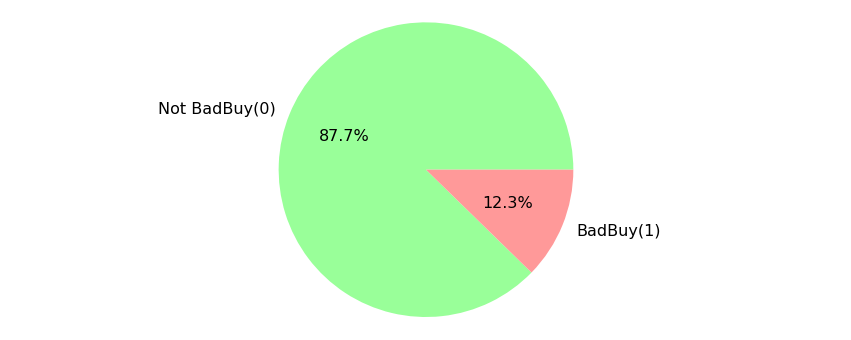

In [41]:
# Get an idea of target category: IsBadBuy
plt.figure(figsize=(15,6))
badbuy_share = df_train["IsBadBuy"].value_counts()
mylabel=["Not BadBuy(0)","BadBuy(1)"]
colors = ['#99ff99','#ff9999']
plt.pie(badbuy_share,
        labels=mylabel,autopct="%1.1f%%",colors=colors,
        textprops={'fontsize': 16})
plt.axis("equal");

#### Note target categories are strongly imbalanced


In [45]:
# Check the percentage of the missing values

percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', ascending=False)

,percent_missing (%)
PRIMEUNIT,95.32
AUCGUART,95.32
WheelType,4.35
WheelTypeID,4.34
Trim,3.23
MMRCurrentAuctionAveragePrice,0.43
MMRCurrentRetailCleanPrice,0.43
MMRCurrentRetailAveragePrice,0.43
MMRCurrentAuctionCleanPrice,0.43
MMRAcquisitionAuctionAveragePrice,0.02


#### As can be seen above, more than 95% values of 'PRIMEUNIT' and 'AUCGUART' are missing. This coulmns can be ignored for the analysis.

In [46]:
# Function dropRemarks
drop_cols = pd.DataFrame(columns=['Drop Remarks'])
def dropRemarks(df,col,remark):
    '''
    Function dropRemarks collects all columns which are goingHow many unique values 
    are in the columns? How common are the respective values  for columns with only a few unique values?
    to be dropped in this analysis. It provides their related remakrks.
    Input:  DataFrame, column name as strng, Remark as string
    output: Dataframe 
    '''
    if col not in drop_cols.index.tolist():
        new_drop = pd.DataFrame(remark,index =[col], columns=['Drop Remarks'])
        return drop_cols.append(new_drop)

In [47]:
# Apply dropRemarks for PRIMEUNIT and AUCGUART
drop_cols = dropRemarks(drop_cols,'PRIMEUNIT','More than 95% of data is missing')
drop_cols = dropRemarks(drop_cols,'AUCGUART','More than 95% of data is missing')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing


In [48]:
# Check data correlation: Sort most highly correlated values
display(df_train.corr()['IsBadBuy'].sort_values())

# Correlation heatmap
# Colormap: Most negative correlations (dark-blue) to most positive correlation (dark red)
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

VehYear                             -0.16
MMRAcquisitionAuctionAveragePrice   -0.11
MMRCurrentAuctionAveragePrice       -0.11
MMRCurrentAuctionCleanPrice         -0.10
MMRCurrentRetailAveragePrice        -0.10
MMRAcquisitionAuctionCleanPrice     -0.10
MMRCurrentRetailCleanPrice          -0.10
VehBCost                            -0.10
MMRAcquisitionRetailAveragePrice    -0.09
MMRAcquisitonRetailCleanPrice       -0.08
BYRNO                               -0.06
WheelTypeID                         -0.04
IsOnlineSale                        -0.00
VNZIP1                               0.01
RefId                                0.02
WarrantyCost                         0.05
VehOdo                               0.08
VehicleAge                           0.17
IsBadBuy                             1.00
Name: IsBadBuy, dtype: float64

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


#### Correlation is a very useful technique to get rid of unecessary columns from our dataset that don't affect our target.
#### The Pearson correlation heatmap above gives us an idea about covariance in the dataset. From what we can see the cost variables ar ehighly correlated, we will make a note of this and investigate whether we need to drop these later.

In [49]:
def simpleBarPlot(df,col,n,m,title):
    '''
    Function simpleBarPlot: 
    Output: Two bar plots - normilized and not normilized
    Input:  DataFrame, Column name, n:m: subplot dimension
           ,Plot Title 
    
    '''
    display(pd.crosstab(columns=df[col], index=df['IsBadBuy']))    
    print('\n################# Plot ',title,' #################')
    print('\n################# Number of unique values: ',
          df[col].nunique(),'#################\n')
    fig, ax = plt.subplots(nrows=n,ncols=m,figsize=(20,12))
    
    freq = pd.crosstab(index=df[col],
                               columns=df['IsBadBuy'], normalize='index')
    freq.plot(kind='bar',ax=ax[0],legend=False,figsize=(20,6),fontsize=16);
   
    count_plot = pd.crosstab(index=df[col],
                           columns=df['IsBadBuy'])    
    count_plot.plot(kind='bar',ax=ax[1],legend=False,figsize=(20,6),fontsize=16);
    
    
    ax[0].set_title(title, fontsize=20)
    ax[0].set_xlabel(col, fontsize=16)
    ax[0].set_ylabel('Frequency', fontsize=16)
    ax[0].legend(labels=['No','Yes'], title= 'Montagsauto')
    
    ax[1].set_title(title, fontsize=20)
    ax[1].set_xlabel(col, fontsize=16)
    ax[1].set_ylabel('Count', fontsize=16)
    ax[1].legend(labels=['No','Yes'], title= 'Montagsauto')
    fig.tight_layout();    

In [50]:
def simpleHistPlot(df,col,title,density):
    '''
    Function simpleHistPlot: 
    Output: Two Histogram plots - normilized and not normilized
    Input:  DataFrame, Column name, n:m: subplot dimension
           , Plot Title   
    
    '''
   # display(df.groupby(('IsBadBuy')[col].count())) 
    fig, ax = plt.subplots(figsize=(10,6))
    df.groupby('IsBadBuy')[col].plot(kind='hist',legend=True,
                                     figsize=(20,6),fontsize=16,
                                      alpha=0.6, density=density);  
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(col, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.legend(labels=['No','Yes'], title= 'Montagsauto')

Model,1500 RAM PICKUP 2WD,1500 RAM PICKUP 4WD,1500 SIERRA PICKUP 2,1500 SIERRA PICKUP 4,1500 SILVERADO PICKU,1500HD SIERRA PICKUP,1500HD SILVERADO PIC,2500 RAM PICKUP 2WD,2500 RAM PICKUP 4WD,2500 SILVERADO PICKU,2500HD SIERRA PICKUP,2500HD SILVERADO PIC,3.2 CL,3.2 CL 3.2L V 6 NA S,3.2 TL,3.2 TL 3.2L V6 EFI,3.2 TL 3.2L V6 FI DO,300,300 2.7L V6 MPI,300 3.5L / 6.0L V12,300 3.5L V6 MPI,300 3.5L V6 MPI / SM,300C,300C 5.7L V8 SFI,300C 5.7L V8 SFI / S,300M,300M 3.5L V6 MPI,300M 3.5L V6 MPI HO,350Z,350Z 3.5L V6 MPI,350Z MFI V6 3.5L DOH,4 RUNNER 2WD V6,4 RUNNER 2WD V6 3.4L,4 RUNNER 2WD V8,4 RUNNER 2WD V8 4.7L,4 RUNNER 4WD V6,4 RUNNER 4WD V6 3.4L,626 4C,626 4C 2.0L I-4 EFI,626 4C 2.0L I4 EFI,626 V6,626 V6 2.5L V6 EFI D,ACCENT,ACCENT 1.5L I-4 EFI,ACCENT 1.6L I-4 MPI,ACCENT 1.6L I4 MPI,ACCENT MFI I-4 1.6L,ACCORD 4C,ACCORD 4C 2.3L I-4 E,ACCORD 4C 2.3L I-4 S,ACCORD 4C 2.3L I4 EF,ACCORD 4C 2.4L I-4 M,ACCORD 4C 2.4L I4 MP,ACCORD 4C MFI I-4 2.,ACCORD V6,ACCORD V6 3.0L V6 EF,AERIO,AERIO 2.0L I4 EFI,AERIO 2.3L I-4 SFI D,AERIO 2.3L I4 DI / S,AERIO 2.3L I4 SFI,AERIO AWD,ALERO 4C,ALERO 4C 2.2L I-4 MP,ALERO 4C 2.2L I4 MPI,ALERO 4C 2.4L I-4 SF,ALERO 4C 2.4L I4 SFI,ALERO V6,ALERO V6 3.4L V6 MPI,ALTIMA,ALTIMA 2.4L I4 EFI,ALTIMA 2.5L I-4 EFI,ALTIMA 2.5L I4 EFI,ALTIMA 2.5L I4 MPI,ALTIMA 2.5L I4 MPI /,ALTIMA 3.5L V6 MPI,ALTIMA 3.5L V6 MPI /,ALTIMA MFI I-4 2.5L,ALTIMA MFI V6 3.5L D,ALTIMA Multiple Engi,AMANTI,AMANTI 3.5L V6 MPI,ARMADA 2WD V8,ARMADA 4WD V8,ASCENDER 2WD 6C,ASCENDER 2WD 6C 4.2L,ASCENDER 2WD V8 5.3L,ASCENDER 4WD 6C,ASCENDER 4WD 6C 4.2L,ASPEN 2WD V8,AURA,AURA 3.5L V6 SFI,AURA 4C,AURA V6,AURA V6 3.5L V6 SFI,AVALANCHE 1500 2WD V,AVALANCHE 1500 4WD V,AVALANCHE 2500 2WD V,AVALON,AVALON 3.0L V6 EFI,AVALON 3.0L V6 EFI D,AVALON 3.5L V6 EFI,AVENGER,AVENGER 4C,AVENGER 4C 2.4L I4 S,AVENGER V6,AVENGER V6 2.7L V6 M,AVENGER V6 Unspecifi,AVEO,AVEO 1.6L I-4 EFI DO,AVEO 1.6L I-4 MPI DO,AVEO 1.6L I4 DOHC,AVEO 1.6L I4 EFI,AVEO 1.6L I4 EFI / M,AVIATOR 2WD V8,AVIATOR 2WD V8 4.6L,AVIATOR AWD V8,AXIOM 2WD V6,AXIOM 2WD V6 3.5L V6,AXIOM 4WD V6 3.5L V6,AZERA,AZERA 3.8L V6 MPI,B2300 PICKUP 2WD 4C,B3000 PICKUP 2WD V6,B3000 PICKUP 4WD V6,BEETLE,BEETLE 2.0L I4 EFI,BEETLE 2.0L I4 EFI /,BEETLE 2.0L I4 MFI /,BEETLE 2.0L I4 MPI,BONNEVILLE,BONNEVILLE 3.8L V6 M,BONNEVILLE 3.8L V6 S,BRAVADA 2WD V6,BRAVADA 2WD V6 4.2L,BRAVADA AWD V6,BRAVADA AWD V6 4.2L,CALIBER,CALIBER 1.8L I4 SFI,CALIBER 2.0L I4 SFI,CAMARO V6,CAMARO V6 3.8L V6 MF,CAMRY 4C,CAMRY 4C 2.4L I-4 EF,CAMRY 4C 2.4L I-4 SF,CAMRY 4C 2.4L I4 EFI,CAMRY 4C 2.4L I4 SFI,CAMRY 4C EI I-4 2.2L,CAMRY 4C Multiple En,CAMRY SOLARA 4C,CAMRY SOLARA 4C 2.4L,CAMRY SOLARA 4C Mult,CAMRY SOLARA V6,CAMRY SOLARA V6 3.0L,CAMRY SOLARA V6 3.3L,CAMRY V6,CAMRY V6 3.0L / 3.3L,CAMRY V6 3.0L /3.3L,CAMRY V6 3.0L V6 EFI,CAMRY V6 3.0L V6 SFI,CAMRY V6 3.5L V6 SFI,CANYON PICKUP 2WD 4C,CANYON PICKUP 2WD I5,CANYON PICKUP 4WD I5,CARAVAN,CARAVAN FWD 4C,CARAVAN FWD 4C 2.4L,CARAVAN FWD V6,CARAVAN FWD V6 3.3L,CARAVAN GRAND AWD V6,CARAVAN GRAND FWD V6,CARAVAN SE,CAVALIER 4C,CAVALIER 4C 2.2L I 4,CAVALIER 4C 2.2L I-4,CAVALIER 4C 2.2L I4,CAVALIER 4C 2.4L I-4,CELICA,CENTURY V6,CENTURY V6 3.1L V6 S,CHARGER,CHARGER 2.7L V6 MPI,CHARGER 3.5L V6 EFI,CHARGER V6,CHARGER V6 2.7L V6 M,CHARGER V6 3.5L V6 E,CHEROKEE 2WD 6C,CHEROKEE 2WD 6C 4.0L,CHEROKEE 4WD 6C,CHEROKEE 4WD 6C 4.0L,CIVIC,CIVIC 1.7L I-4 MPI S,CIVIC 1.7L I4 MFI /,CIVIC 1.7L I4 MPI,CIVIC MFI I-4 1.7L S,COBALT,COBALT 2.2L I-4 MPI,COBALT 2.2L I4 MPI,COBALT 2.2L I4 MPI /,COLORADO PICKUP 2WD,COLORADO PICKUP 4WD,COMMANDER,COMMANDER 2WD V6,COMMANDER 2WD V6 3.7,COMMANDER 2WD V8,COMMANDER 2WD V8 4.7,COMMANDER 4WD V6,COMMANDER 4WD V6 3.7,COMMANDER 4WD V8,COMMANDER 4WD V8 4.7,COMPASS 2WD 4C,COMPASS 2WD 4C 2.0L,COMPASS 2WD 4C 2.4L,COMPASS 4WD 4C,COMPASS 4WD 4C 2.4L,COMPASS FWD 4C,CONCORDE,CONCORDE 2.7L V6 SFI,CONCORDE 3.2L V6 EFI,CONCORDE 3.5L V6 MPI,CONTINENTAL,CONTINENTAL 4.6L V8,COOPER,COOPER 1.6L I-4 EFI,COOPER 1.6L I4 EFI,COOPER S,COOPER S 1.6L I4 EFI,COROLLA,COROLLA 1.8L I-4 EFI,COROLLA 1.8L I4 EFI,COROLLA Multiple Eng,COUP


################# Plot  Vehicle Model  #################

################# Number of unique values:  1063 #################



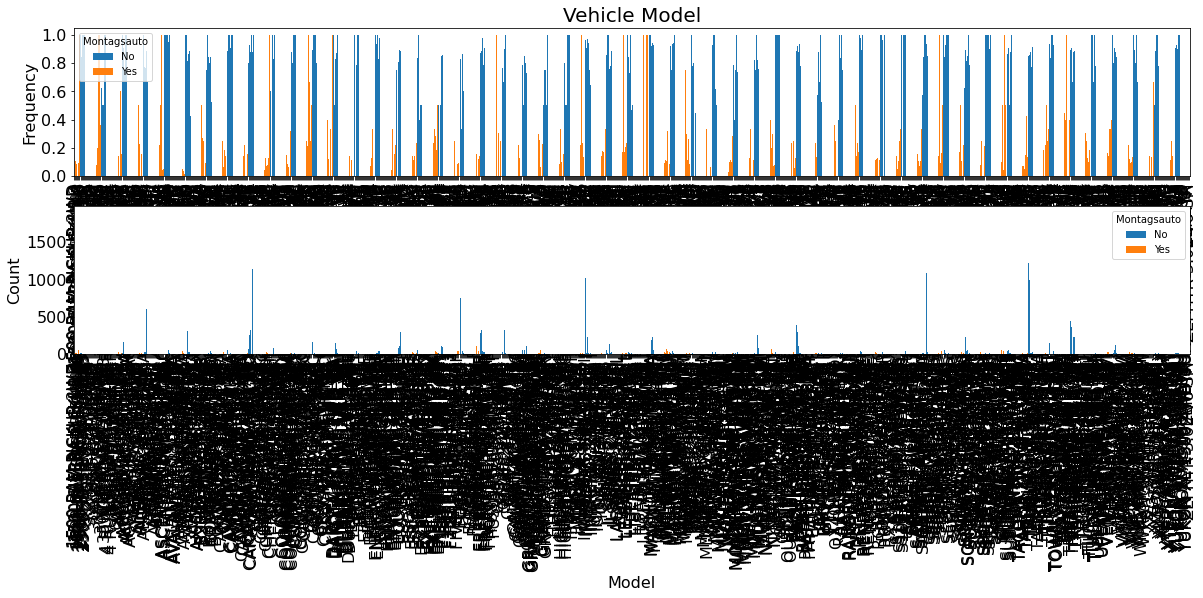

In [51]:
# Simple Bar plot for vehicle model which has the most unique values
simpleBarPlot(df_train,'Model',2,1,'Vehicle Model')

SubModel,2D CONVERTIBLE,2D CONVERTIBLE DREAM CRUISER,2D CONVERTIBLE GL,2D CONVERTIBLE GLS,2D CONVERTIBLE GT,2D CONVERTIBLE GTC,2D CONVERTIBLE LIMITED,2D CONVERTIBLE LX,2D CONVERTIBLE LXI,2D CONVERTIBLE SE,2D CONVERTIBLE SLE,2D CONVERTIBLE TOURING,2D COUPE,2D COUPE 5SP,2D COUPE AUTO,2D COUPE DX 5SP,2D COUPE DX AUTO,2D COUPE DX VALUE PACKAGE AUTO,2D COUPE EX 5SP,2D COUPE EX 6SP,2D COUPE EX AUTO,2D COUPE GL,2D COUPE GL1,2D COUPE GL2,2D COUPE GLS,2D COUPE GS,2D COUPE GT,2D COUPE GT PREMIUM,2D COUPE GT1,2D COUPE GTP,2D COUPE GTS,2D COUPE GX,2D COUPE LIMTED,2D COUPE LS,2D COUPE LT,2D COUPE LTZ,2D COUPE LX,2D COUPE LX 5SP,2D COUPE LX AUTO,2D COUPE LXI,2D COUPE R/T,2D COUPE RS,2D COUPE SE,2D COUPE SE AUTO,2D COUPE SE1,2D COUPE SS,2D COUPE SVT,2D COUPE SXT,2D COUPE TYPE S,2D COUPE TYPE S NAVIGATION AUTO,2D COUPE Z24,2D COUPE ZX2,2D COUPE ZX3,2D COUPE ZX3 S,2D COUPE ZX3 SES,2D COUPE ZX5 S,2D EXT CAB 2.3L EDGE,2D EXT CAB 2.3L XL,2D EXT CAB 3.0L,2D EXT CAB 3.0L DUAL SPORT,2D EXT CAB 3.0L DUAL SPORT FFV,2D EXT CAB 3.0L EDGE,2D EXT CAB 3.0L SE,2D EXT CAB 3.0L XL,2D EXT CAB 3.0L XLT,2D EXT CAB 4.0L EDGE,2D EXT CAB 4.0L XL,2D HARTOP CONVERTIBLE GT,2D HATCHBACK,2D HATCHBACK GS,2D HATCHBACK GT,2D HATCHBACK S,2D HATCHBACK ZX3,2D HATCKBACK SI 5SP,2D LIFTBACK GT,2D QUAD COUPE LEVEL 2,2D QUAD COUPE LEVEL 3,2D ROADSTER,2D ROADSTER GXP,2D SEDAN,2D SEDAN GX,2D SPORT UTILITY,2D SPYDER GS,2D SPYDER GT,2D SPYDER GTS,2D SUV 4.0L SPORT,2D SUV 4.0L SPORT XLS,2D SUV 4.0L SPORT XLT,2D SUV CONVERTIBLE 2.0L,3D COUPE SC1,3D COUPE SC2,3D EXT CAB 2.2L,3D EXT CAB 2.2L FFV,3D EXT CAB 4.3L,4D CROSSOVER SE,4D CROSSOVER SEL,4D CROSSOVER SEL PLUS,4D CUV,4D CUV 2.0L XLS,4D CUV 2.0L XLT,4D CUV 2.2L,4D CUV 2.2L XE,4D CUV 2.3L XLS,4D CUV 2.3L XLT,4D CUV 2.7L,4D CUV 2.7L GLS,4D CUV 3.0L,4D CUV 3.0L LIMITED,4D CUV 3.0L SE,4D CUV 3.0L SEL,4D CUV 3.0L XLS,4D CUV 3.0L XLT,4D CUV 3.5L,4D CUV 3.5L GLS,4D CUV 3.6L XE,4D CUV DELUXE,4D CUV DLX,4D CUV GL,4D CUV GLS,4D EXT CAB 3.0L,4D EXT CAB 3.0L EDGE,4D EXT CAB 3.0L FFV XLT,4D EXT CAB 3.0L XL,4D EXT CAB 3.0L XLT,4D EXT CAB 4.0L EDGE,4D EXT CAB 4.0L FX4,4D EXT CAB 4.0L XL,4D EXT CAB 4.0L XLT,4D HARDTOP EX,4D HARDTOP JLS,4D HARDTOP LX,4D HATCHBACK,4D HATCHBACK AWD,4D HATCHBACK GS,4D HATCHBACK S,4D HATCHBACK ZX5,4D HATCHBACK ZX5 S,4D HATCHBACK ZX5 SE,4D HATCHBACK ZX5 SES,4D MINIVAN 3.4L,4D MINIVAN 3.4L VALUE,4D MINIVAN EXT 3.4L,4D MINIVAN EXT 3.4L GL,4D MINIVAN EXT 3.4L GLS,4D MINIVAN EXT 3.5L,4D PASSENGER 3.8L SE,4D PASSENGER 3.8L SE SPORT,4D PASSENGER 3.8L SEL,4D PASSENGER 3.8L SEL LIMITED,4D PASSENGER 3.9L SES,4D PASSENGER 4.2L LIMITED,4D PASSENGER 4.2L SEL,4D SEDAN,4D SEDAN 1.8,4D SEDAN 1.8S,4D SEDAN 1LT,4D SEDAN 2.0L GL,4D SEDAN 2.0L GLS,4D SEDAN 2.4I,4D SEDAN 2.5 S,4D SEDAN 2.5 SE,4D SEDAN 2.5 SL,4D SEDAN 2.5I,4D SEDAN 2.5L,4D SEDAN 2.5L GLS,4D SEDAN 2.5L PKG 2,4D SEDAN 2.5RS,4D SEDAN 2.5T,4D SEDAN 2.7L,4D SEDAN 2.7L SE,4D SEDAN 2.7L SXT,4D SEDAN 3.5L,4D SEDAN 3.5L AWD,4D SEDAN 3.5L AWD SXT,4D SEDAN 3.5L SE,4D SEDAN 3.5L SXT,4D SEDAN 35TH ANNIVERSARY AWD,4D SEDAN 6SP,4D SEDAN AUTO,4D SEDAN AWD,4D SEDAN AWD 3.5L,4D SEDAN AWD SE,4D SEDAN AWD SEL,4D SEDAN CARTIER,4D SEDAN CARTIER L,4D SEDAN CE,4D SEDAN CLASSIC,4D SEDAN CUSTOM,4D SEDAN CX,4D SEDAN CXL,4D SEDAN CXS,4D SEDAN DE,4D SEDAN DX,4D SEDAN DX AUTO,4D SEDAN ES,4D SEDAN ES HIGHLINE,4D SEDAN EX,4D SEDAN EX 5SP,4D SEDAN EX AUTO,4D SEDAN EX AUTO NAVIGATION,4D SEDAN EXECUTIVE,4D SEDAN FFV TOURING,4D SEDAN GL,4D SEDAN GL1,4D SEDAN GL2,4D SEDAN GLE,4D SEDAN GLS,4D SEDAN GS,4D SEDAN GS 3.0L FFV,4D SEDAN GT,4D SEDAN GT TURBO,4D SEDAN GT1,4D SEDAN GT2,4D SEDAN GTP,4D SEDAN GTS,4D SEDAN GX,4D SEDAN GXE,4D SEDAN GXP,4D SEDAN HEMI,4D SEDAN HYBRID,4D SEDAN HYBRID AUTO,4D SEDAN I,4D SEDAN L AWD,4D SEDAN L200,4D SEDAN L300,4D SEDAN LE,4D SEDAN LEVEL 1,4D SEDAN LEVEL 2,4D SEDAN LEVEL 3,4D SEDAN LIMITED,4D SEDAN LIMITED AWD,4D SEDAN LIMITED TURBO,4D SEDAN LS,4D SEDAN LS 3.5L,4D SEDAN LS 3.5L FFV,4D SEDAN LS 3.6L,4D SEDAN LS CLASSIC,4D SEDAN LS FFV,4D SEDAN LS PREMIUM,4D SEDAN LS SPORT,4D SEDAN LT


################# Plot  Vehicle Sub-Model  #################

################# Number of unique values:  863 #################



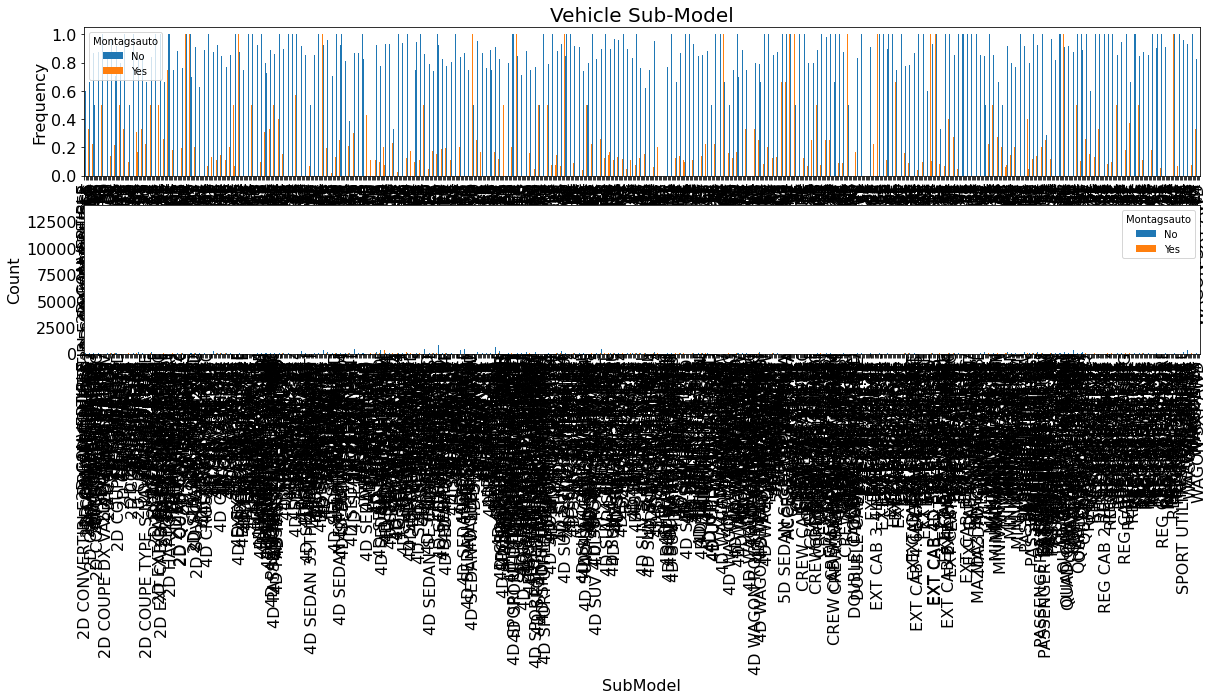

In [52]:
# Simple Bar plot for vehicle model which has the most unique values
simpleBarPlot(df_train,'SubModel',2,1,'Vehicle Sub-Model')

In [53]:
# Update the drop columns names
drop_cols = dropRemarks(drop_cols,'Model','Too many distincts values')
drop_cols = dropRemarks(drop_cols,'SubModel','Too many distincts values')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values


Auction,ADESA,MANHEIM,OTHER
IsBadBuy,,,
0,12246,36328,15433
1,2193,4715,2068



################# Plot  Auction provider  #################

################# Number of unique values:  3 #################



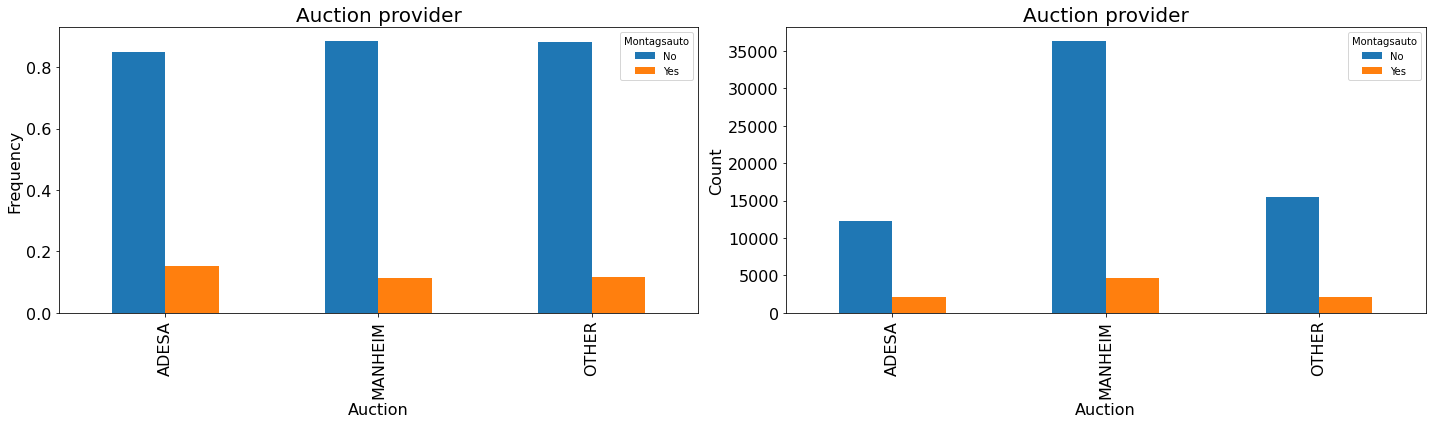

In [54]:
# Simple Bar plot for vehicle model which has the most unique values
simpleBarPlot(df_train,'Auction',1,2,'Auction provider')

,VehYear,VehicleAge
VehYear,1.00,-0.96
VehicleAge,-0.96,1.00


VehicleAge,0,1,2,3,4,5,6,7,8,9
IsBadBuy,,,,,,,,,,
0,2,2969,7942,14601,15149,11061,6575,3641,1623,444
1,0,125,540,1301,1864,1895,1447,1005,597,202



################# Plot  VehicleAge  #################

################# Number of unique values:  10 #################



,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge


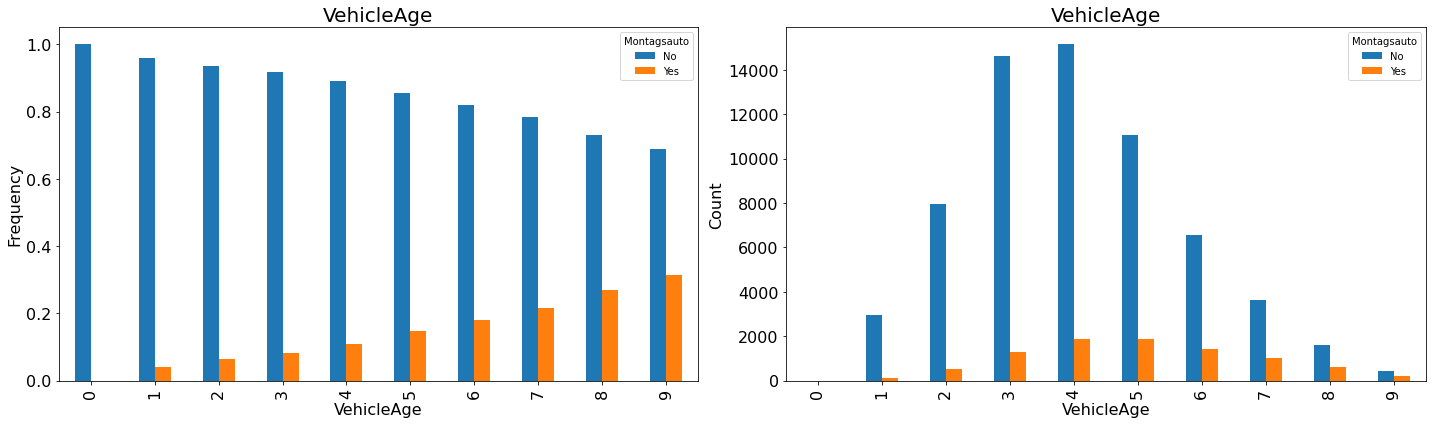

In [55]:
# Investigate VehYear and VehicleAge

# Check the correlation between Year of Manufacture
# of the vehicle Age of the car at the time of the auction
display(df_train[['VehYear','VehicleAge']].corr())

simpleBarPlot(df_train,'VehicleAge',1,2,'VehicleAge')

# Note: AS can be seen, the older the vehicle, more number of defected vehicle
# Update the drop columns names
drop_cols = dropRemarks(drop_cols,'VehYear','96% Correlation with VehicleAge')
drop_cols

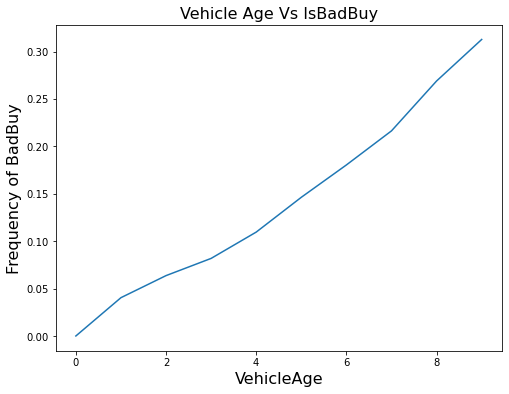

In [58]:
ax = df_train.groupby('VehicleAge')['IsBadBuy'].mean().plot(figsize=(8,6));
ax.set_xlabel('VehicleAge', fontsize=16);
ax.set_ylabel('Frequency of BadBuy', fontsize=16);
ax.set_title('Vehicle Age Vs IsBadBuy', fontsize=16 );

#### Again, as expected, we see that vehicle age is strongly indicative of a bad buy.
#### Let's look at how the vehicle manufacturer is related to the probability of a bad buy:

Make,ACURA,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FORD,GMC,HONDA,HUMMER,HYUNDAI,INFINITI,ISUZU,JEEP,KIA,LEXUS,LINCOLN,MAZDA,MERCURY,MINI,MITSUBISHI,NISSAN,OLDSMOBILE,PLYMOUTH,PONTIAC,SATURN,SCION,SUBARU,SUZUKI,TOYOTA,TOYOTA SCION,VOLKSWAGEN,VOLVO
IsBadBuy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24,607,28,15567,7707,11579,9563,574,443,1,1578,28,125,1390,2192,20,68,821,758,16,907,1752,194,1,3751,1857,118,22,1133,1030,1,115,37
1,9,113,5,1681,1137,1333,1742,75,54,0,233,14,9,254,292,11,29,158,155,8,123,333,49,1,507,306,11,6,195,114,0,19,0



################# Plot  Company  #################

################# Number of unique values:  33 #################



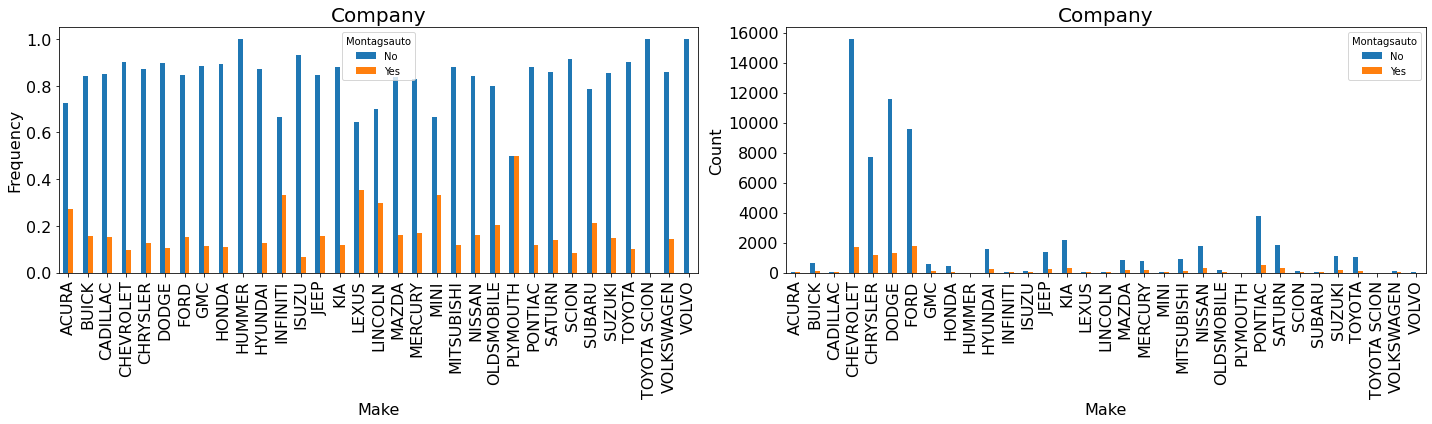

In [59]:
#simpleBarPlot(df_train,'Make','Make')
simpleBarPlot(df_train,'Make',1,2,'Company')

#### Dogde, Ford, Chevrolet and Chrysler cars account for the most listed as well as most bad buys. That makes sense. If a company has more listings, it will as well have higher bad buys.

Trim,1,150,2,250,3,3 R,Adv,Bas,C,CE,CX,CXL,CXS,Car,Cin,Cla,Cus,DE,DS,DX,Den,Dur,ES,EX,EX-,Edd,Edg,Ent,Exe,FX4,GL,GLE,GLS,GS,GT,GTC,GTP,GTS,GX,GXE,GXP,Har,Her,Hig,Hyb,JLS,JLX,Kin,L,L 3,L10,L20,L30,LE,LL,LS,LT,LTZ,LW2,LW3,LX,LXi,Lar,Lim,Lux,Max,Maz,Nor,OZ,Out,Ove,Plu,Pre,Pro,R/T,RS,RT,Ral,Ren,S,SC1,SC2,SE,SE-,SEL,SES,SL,SL1,SL2,SLE,SLT,SR5,SS,ST,STX,SV6,SVT,SX,SXT,Si,Sig,Spe,Spo,Spy,Sta,T5,Tou,Ult,VP,Val,W/T,X,XE,XL,XLS,XLT,XR,XRS,XS,Xsp,Z24,Z71,ZR2,ZTS,ZTW,ZX2,ZX3,ZX4,ZX5,ZXW,eC,eL,i,s
IsBadBuy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,155,265,650,3,163,6,208,12223,4,202,205,86,9,2,5,416,240,44,7,34,4,1,608,1861,6,178,90,4,15,8,344,10,1189,247,684,32,59,7,7,25,1,1,49,4,2,1,0,10,5,1,14,94,113,511,1,9280,3275,16,6,23,2137,78,766,801,37,15,0,393,12,0,3,14,60,9,33,5,7,2,31,537,10,15,8199,5,1231,483,52,31,29,480,1062,57,56,744,266,78,7,70,3447,3,8,5,1062,16,23,2,1952,1,21,21,91,13,189,376,610,1095,18,5,1,1,0,41,2,51,6,6,208,506,76,25,2,8,432,170
1,13,40,115,0,25,1,19,1727,3,19,25,11,0,1,2,59,59,1,1,13,2,1,92,259,2,35,18,0,4,5,66,9,166,48,124,2,7,1,0,8,2,0,9,3,1,0,1,0,3,0,4,21,28,61,0,894,265,2,2,16,280,33,136,164,4,0,1,55,2,1,2,9,5,5,11,1,0,2,5,93,6,6,1149,2,129,118,5,4,7,63,138,8,13,97,22,9,2,7,378,0,3,0,192,5,3,0,304,0,6,2,11,1,17,72,162,262,1,3,1,0,1,5,2,16,1,6,38,100,15,7,2,0,55,42



################# Plot  Trim  #################

################# Number of unique values:  134 #################



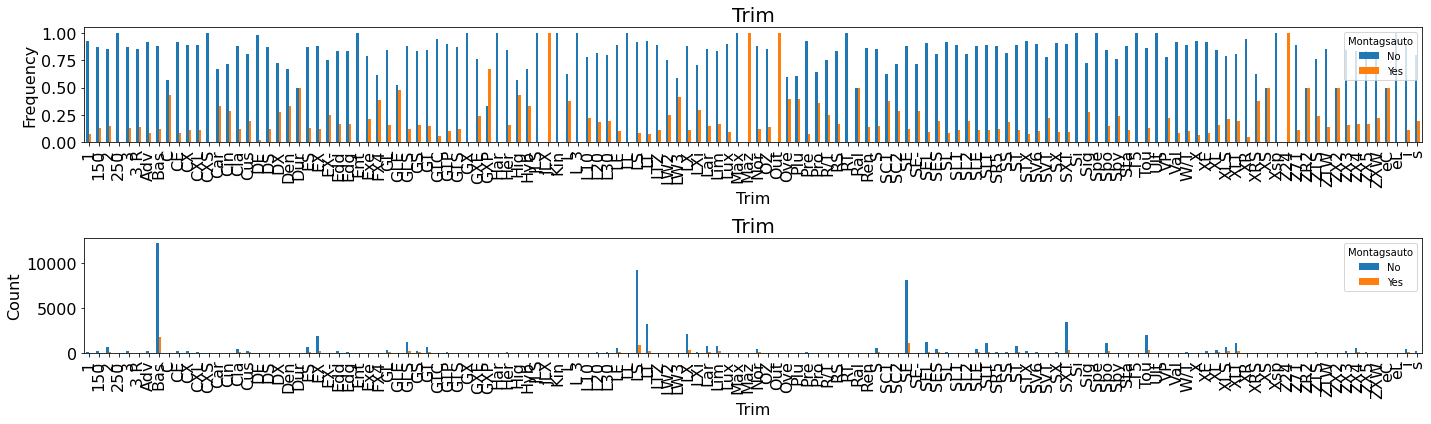

In [60]:
#simpleBarPlot(df_train,'Make','Make')
simpleBarPlot(df_train,'Trim',2,1,'Trim')

In [61]:
# Note: Too many different distinct Trim values. 
# Update the drop columns names
drop_cols = dropRemarks(drop_cols,'Trim','Too many distinct values')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values


Color,BEIGE,BLACK,BLUE,BROWN,GOLD,GREEN,GREY,MAROON,NOT AVAIL,ORANGE,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW
IsBadBuy,,,,,,,,,,,,,,,,
0,1373,6769,9158,380,4494,2792,6976,1786,70,381,213,317,5432,13032,10617,210
1,211,858,1189,56,737,402,911,260,24,34,29,56,825,1843,1506,34



################# Plot  Color  #################

################# Number of unique values:  16 #################



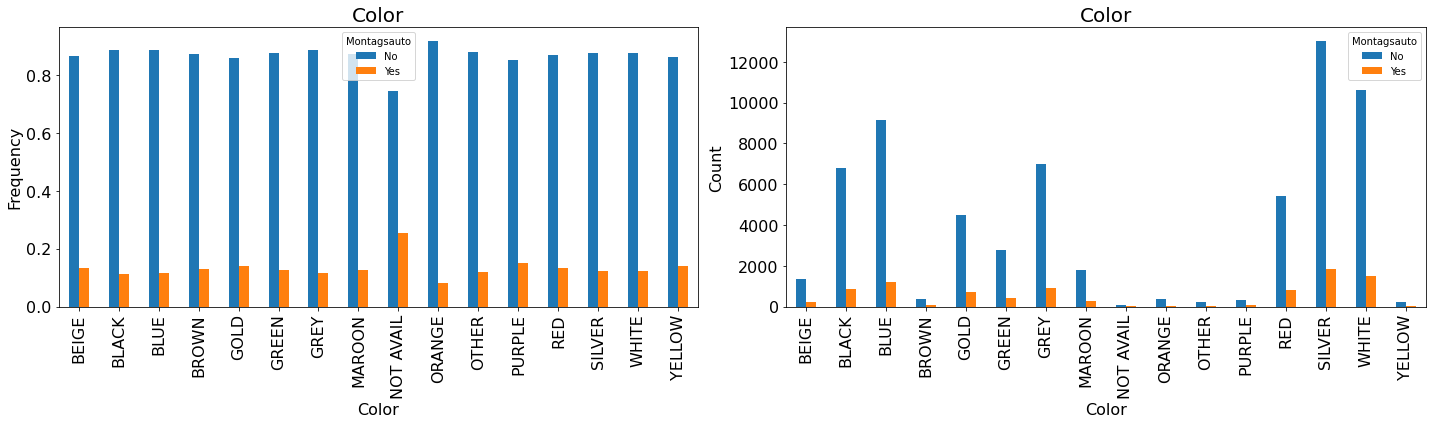

In [62]:
# Investigate Color
simpleBarPlot(df_train,'Color',1,2,'Color')

In [63]:
# Note: Too many different distinct Trim values. 
# Update the drop columns names
drop_cols = dropRemarks(drop_cols,'Color','The effect is too suspicious!')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values
Color,The effect is too suspicious!


Transmission,AUTO,MANUAL,Manual
IsBadBuy,,,
0,61722,2276,1
1,8676,299,0



################# Plot  Transmission  #################

################# Number of unique values:  3 #################



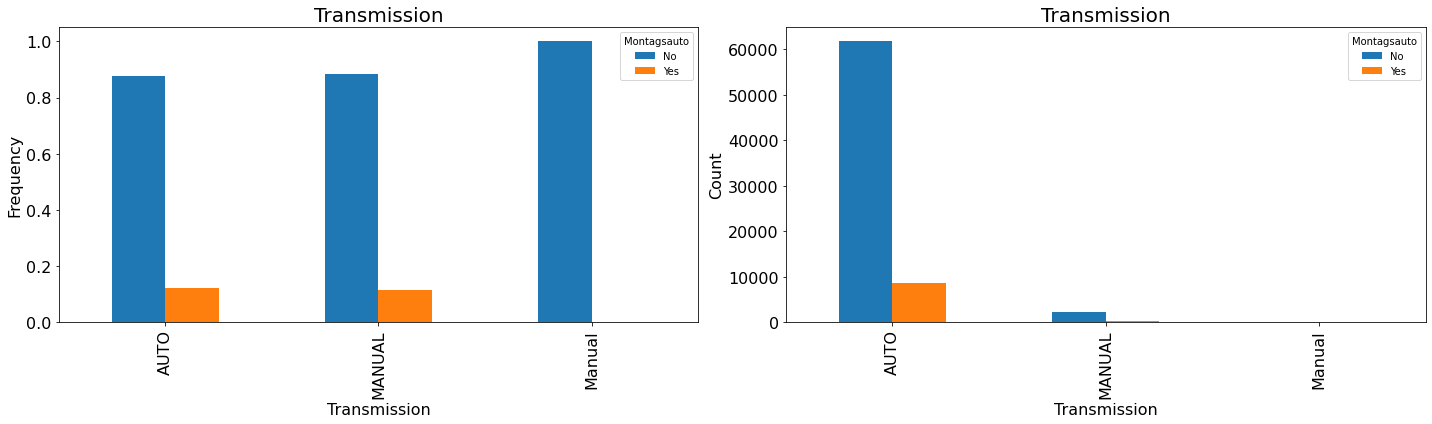

In [64]:
# Plot Transmission
simpleBarPlot(df_train,'Transmission',1,2,'Transmission')

WheelTypeID,0.00,1.00,2.00,3.00
IsBadBuy,,,,
0,4,32065,30349,656
1,1,3985,2655,99



################# Plot  WheelTypeID  #################

################# Number of unique values:  4 #################



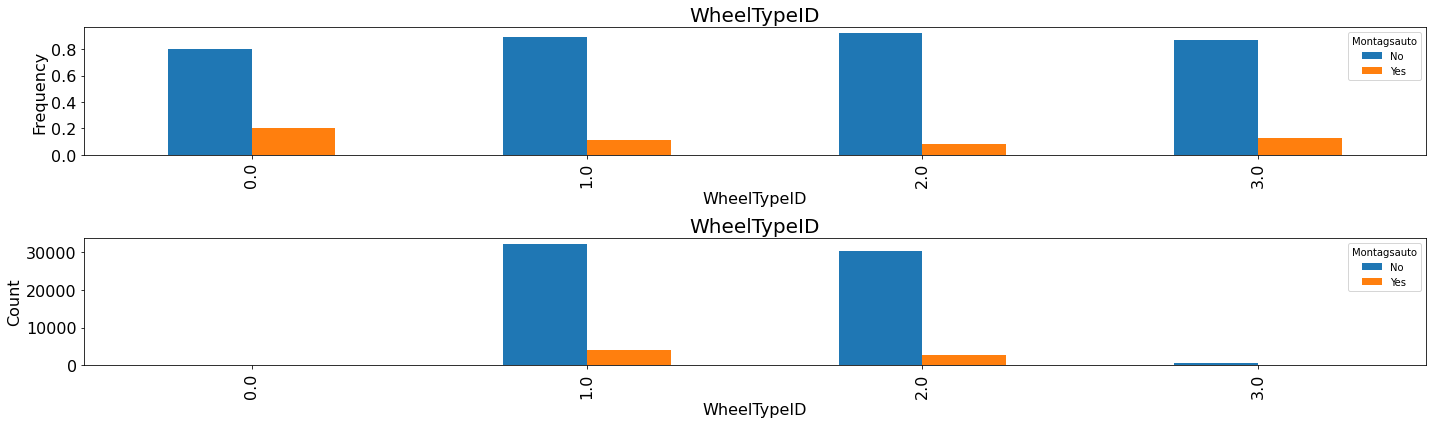

In [65]:
simpleBarPlot(df_train,'WheelTypeID',2,1,'WheelTypeID')

In [66]:
drop_cols = dropRemarks(drop_cols,'WheelTypeID','Redundant, as WheelType is available!')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values
Color,The effect is too suspicious!
WheelTypeID,"Redundant, as WheelType is available!"


#### Let's look at how the WheelType is related to the probability of a bad buy


WheelType,Alloy,Covers,Special
IsBadBuy,,,
0,32065,30349,656
1,3985,2655,99



################# Plot  WheelType  #################

################# Number of unique values:  3 #################



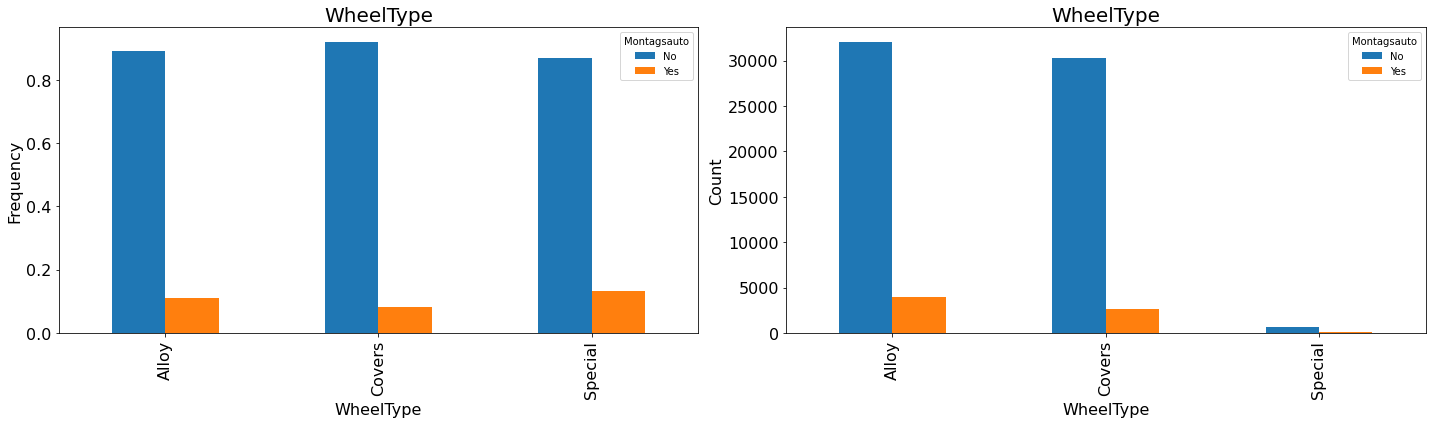

In [67]:
simpleBarPlot(df_train,'WheelType',1,2,'WheelType')

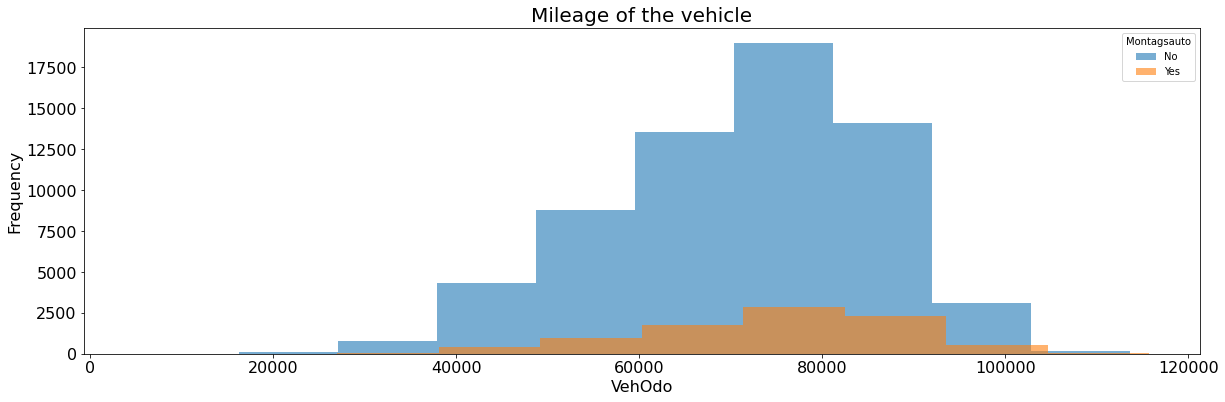

In [68]:
# Carmilage = Kms driven / Fuel consumed
simpleHistPlot(df_train,'VehOdo','Mileage of the vehicle',False)


### Plot odometer reading vs WarrantyCost

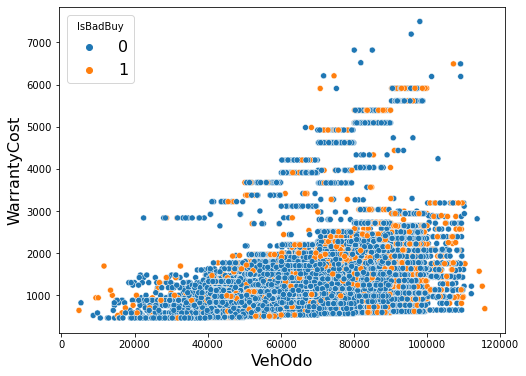

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x='VehOdo',y='WarrantyCost',hue='IsBadBuy');
plt.xlabel('VehOdo', fontsize=16);
plt.ylabel('WarrantyCost', fontsize=16);
plt.legend(title='IsBadBuy', fontsize=16);

### Plot the manufacturer's country

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
IsBadBuy,,,,
0,53641,168,6972,3221
1,7387,27,1061,501



################# Plot  Nationality  #################

################# Number of unique values:  4 #################



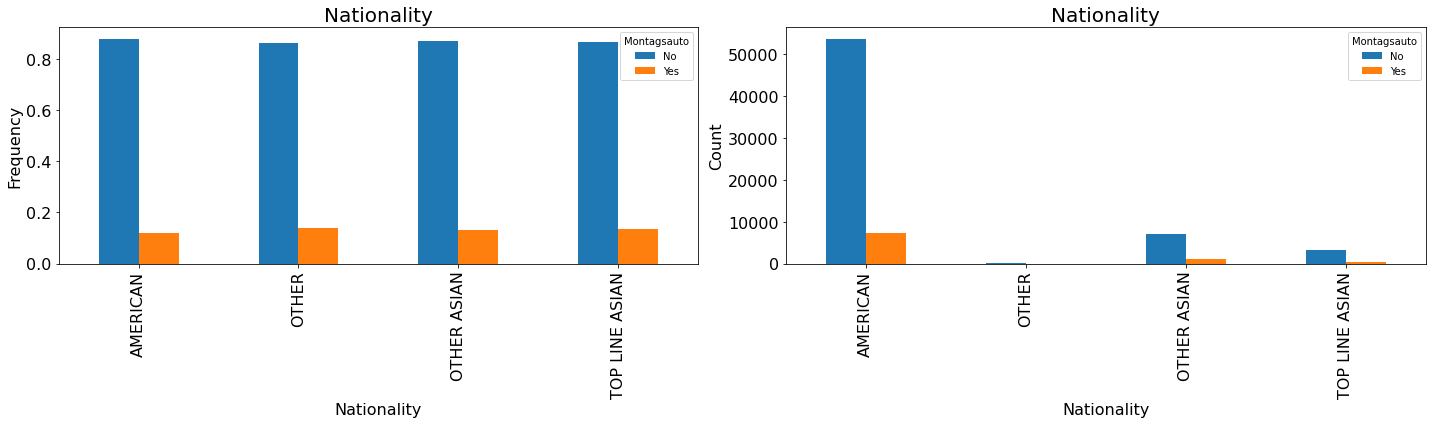

In [72]:
simpleBarPlot(df_train,'Nationality',1,2,'Nationality')

#### Identifies if the manufacturer is one of the top three American manufacturers

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
TopThreeAmericanName,,,,
CHRYSLER,23399,0,0,0
FORD,12315,0,0,0
GM,25314,0,0,0
OTHER,0,195,8033,3722


Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
Make,,,,
ACURA,0,0,33,0
BUICK,720,0,0,0
CADILLAC,33,0,0,0
CHEVROLET,17248,0,0,0
CHRYSLER,8844,0,0,0
DODGE,12911,0,0,0
FORD,11305,0,0,0
GMC,648,0,0,0
HONDA,0,0,0,497


TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
IsBadBuy,,,,
0,20674,10389,22578,10361
1,2725,1926,2736,1589



################# Plot  TopThreeAmericanName  #################

################# Number of unique values:  4 #################



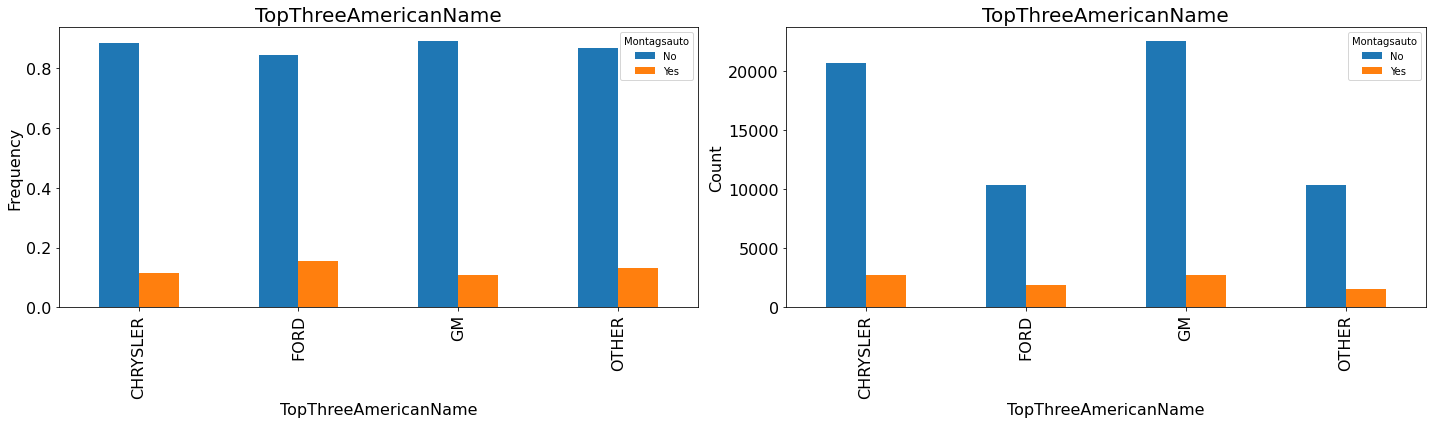

In [73]:
display(pd.crosstab(index=df_train['TopThreeAmericanName'],columns=df_train['Nationality'])) 
display(pd.crosstab(index=df_train['Make'],columns=df_train['Nationality'])) 
simpleBarPlot(df_train,'TopThreeAmericanName',1,2,'TopThreeAmericanName')

#### The size category of the vehicle (Compact, SUV, etc.)

Size,COMPACT,CROSSOVER,LARGE,LARGE SUV,LARGE TRUCK,MEDIUM,MEDIUM SUV,SMALL SUV,SMALL TRUCK,SPECIALTY,SPORTS,VAN
IsBadBuy,,,,,,,,,,,,
0,6060,1576,8032,1201,2810,27244,6897,1963,739,1739,633,5108
1,1145,183,818,232,360,3541,1193,313,125,176,144,746



################# Plot  Size  #################

################# Number of unique values:  12 #################



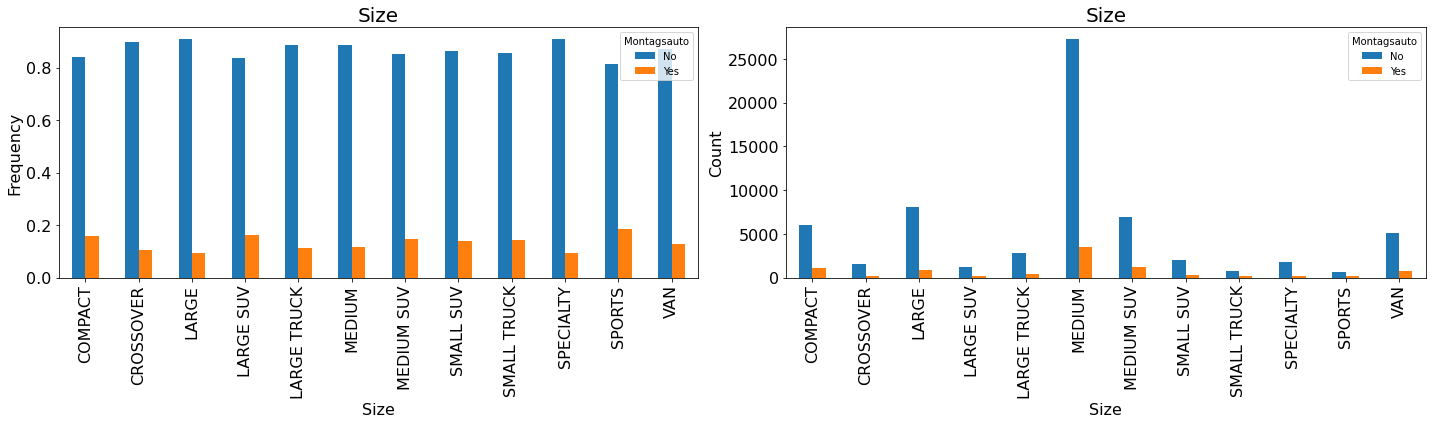

In [74]:
simpleBarPlot(df_train,'Size',1,2,'Size')

### Pair Plot of Acquisition costs

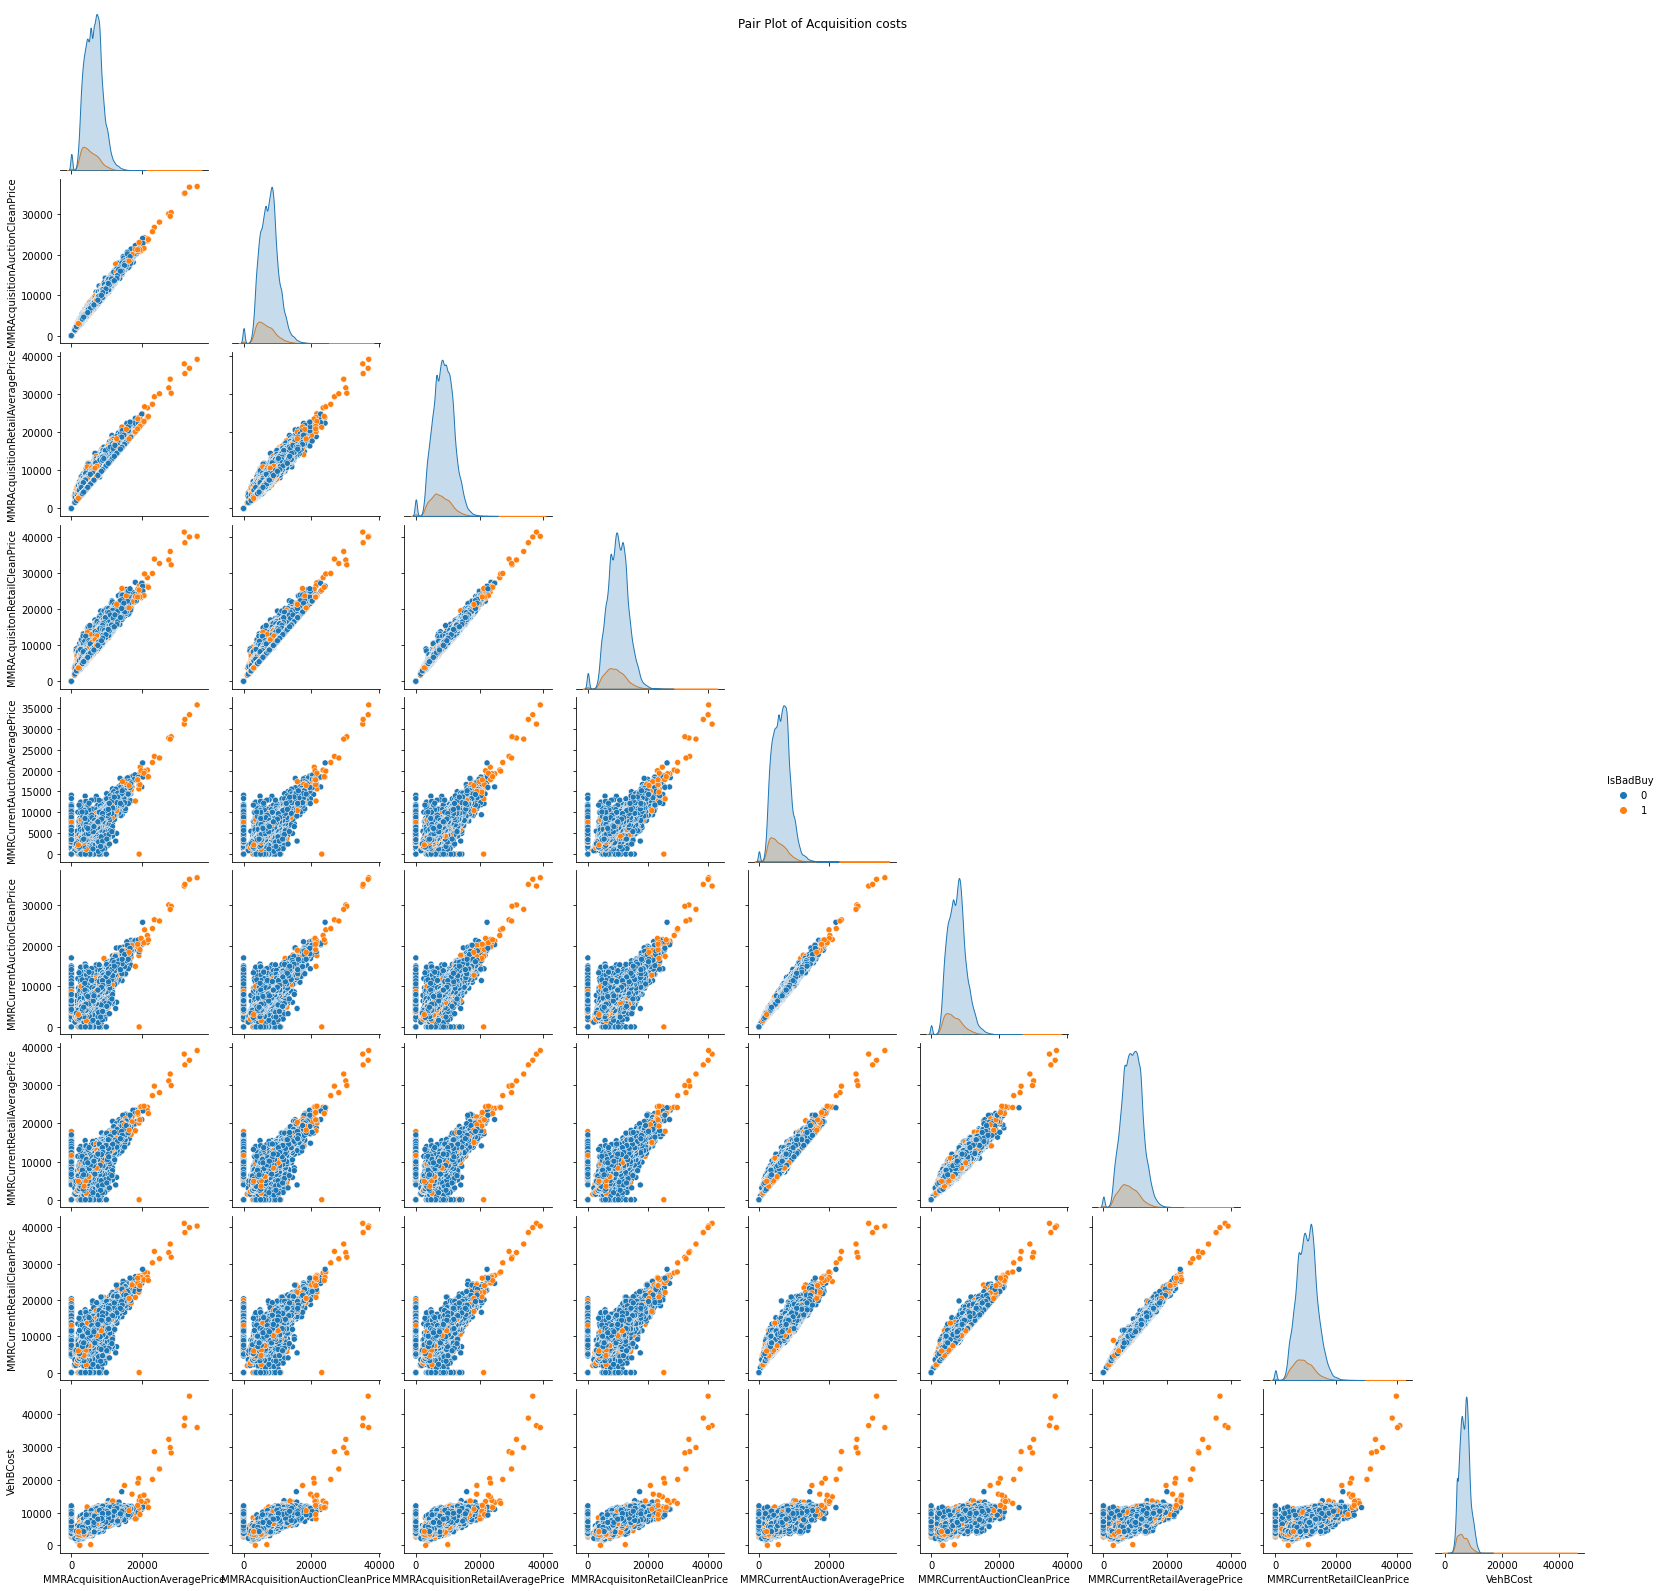

In [75]:
mmr_cols = ['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
           'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','IsBadBuy','VehBCost']

ax=sns.pairplot(df_train[mmr_cols], hue="IsBadBuy",corner=True);
ax.fig.suptitle("Pair Plot of Acquisition costs");

In [76]:
drop_cols = dropRemarks(drop_cols,'MMRCurrentAuctionCleanPrice','About 99% correlation with MMRCurrentAuctionAveragePrice')
drop_cols = dropRemarks(drop_cols,'MMRCurrentRetailCleanPrice','About 99% correlation with MMRCurrentRetailAveragePrice')
drop_cols = dropRemarks(drop_cols,'MMRAcquisitionAuctionCleanPrice','About 99% correlation with MMRAcquisitionAuctionAveragePrice')
drop_cols = dropRemarks(drop_cols,'MMRAcquisitonRetailCleanPrice','About 99% correlation with MMRQcquisitionRetailAverageprice')
drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values
Color,The effect is too suspicious!
WheelTypeID,"Redundant, as WheelType is available!"
MMRCurrentAuctionCleanPrice,About 99% correlation with MMRCurrentAuctionAv...
MMRCurrentRetailCleanPrice,About 99% correlation with MMRCurrentRetailAve...


### Unique number assigned to the buyer that purchased the vehicle

BYRNO,835,1031,1035,1041,1045,1051,1055,1081,1082,1085,1086,1121,1125,1141,1151,1152,1156,1157,1191,1231,1235,3453,3582,5546,8172,8655,10310,10315,10410,10420,10425,10430,10510,11210,11410,16044,16369,16926,17212,17675,18091,18111,18822,18880,18881,19064,19619,19638,19662,20207,20234,20392,20740,20833,20928,21047,21053,21973,22808,22916,23359,23657,25100,52117,52492,52598,52644,52646,53245,99740,99741,99750,99760,99761
IsBadBuy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2630,29,9,6,49,68,12,34,7,41,1,18,10,19,62,4,9,1,92,329,425,2596,0,2000,977,1785,37,159,10,4,1,160,4,8,34,1388,7,1096,2163,2253,9,1830,1805,3047,1596,719,2420,1658,1314,1188,1835,215,2035,1635,2330,125,2439,2253,1598,2465,1726,314,1420,1088,597,528,327,296,63,299,0,2574,0,3722
1,357,2,1,2,13,5,0,3,0,9,0,3,0,2,2,2,1,0,12,60,44,331,1,211,128,287,9,16,0,0,0,21,0,0,6,243,0,232,354,364,2,285,297,541,155,105,318,195,203,163,228,40,379,363,256,25,377,295,253,387,350,43,202,160,96,59,62,51,18,44,1,79,2,221



################# Plot  BYRNO  #################

################# Number of unique values:  74 #################



,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values
Color,The effect is too suspicious!
WheelTypeID,"Redundant, as WheelType is available!"
MMRCurrentAuctionCleanPrice,About 99% correlation with MMRCurrentAuctionAv...
MMRCurrentRetailCleanPrice,About 99% correlation with MMRCurrentRetailAve...


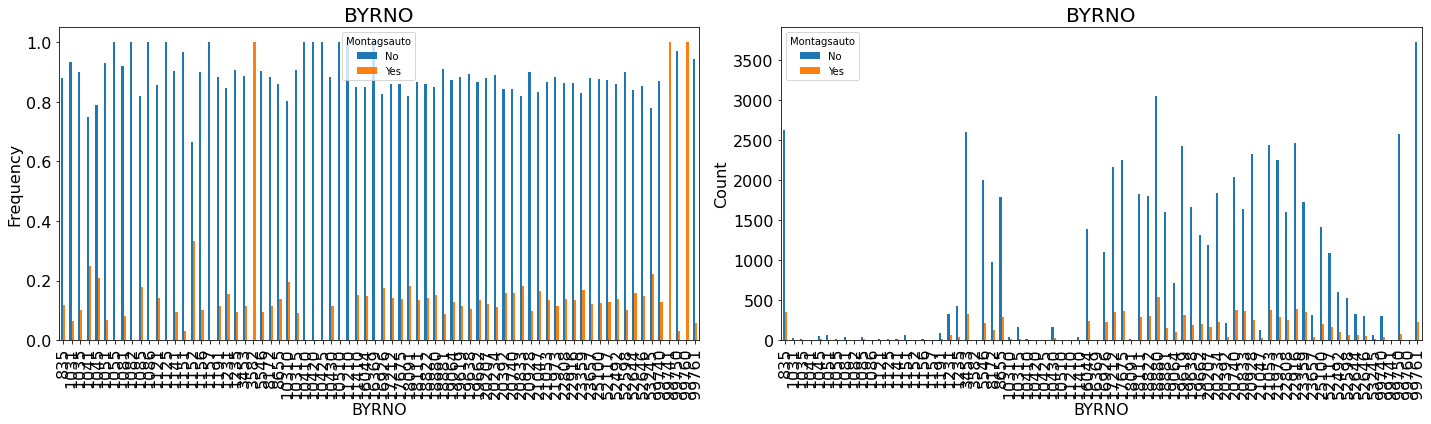

In [77]:
simpleBarPlot(df_train,'BYRNO',1,2,'BYRNO')
drop_cols = dropRemarks(drop_cols,'BYRNO','Unique Identification Number ')
drop_cols

VNZIP1,2764,3106,8505,12552,16066,16137,17028,17406,17545,19440,20166,21014,21075,22403,22801,23234,23606,25071,25177,26431,27407,27542,28273,28625,29070,29323,29461,29532,29697,30120,30212,30272,30315,30331,30529,32124,32219,32225,32503,32750,32772,32812,32824,33073,33311,33314,33411,33619,33762,33809,33916,34203,34761,35004,35613,37122,37138,37210,37421,37771,38118,38128,38637,39208,39402,42104,43207,45005,45011,46239,46803,47129,48265,50111,55369,60440,60443,60445,62207,63044,64153,64161,68138,70002,70401,70460,71119,72117,73108,73129,74135,75020,75050,75061,75236,76040,76063,76101,77041,77061,77073,77086,77301,78219,78227,78426,78610,78745,78754,79605,79932,80011,80022,80112,80229,80817,83687,83716,84087,84104,85009,85018,85040,85204,85226,85248,85260,85284,85338,85353,87105,87109,89120,89139,89165,89506,90045,90650,91752,91763,91770,92057,92101,92337,92504,92807,94544,95673,97060,97217,97402,98064,99224
IsBadBuy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13,88,277,6,6,2,33,119,100,440,458,179,814,437,467,4,33,0,142,121,483,3072,1606,1082,247,3,285,1472,1679,115,526,1043,120,372,1,1045,590,5,29,208,69,73,3352,107,114,161,237,1558,148,608,26,163,812,414,188,253,17,488,245,313,230,15,199,131,117,215,11,696,21,88,122,208,13,426,60,159,103,87,42,84,9,583,25,13,91,91,102,54,1045,36,2182,246,1372,330,2095,1404,324,1,1252,500,111,781,8,1036,753,55,72,77,1132,104,66,1154,1864,1,596,779,14,163,154,615,712,146,1829,32,1777,1,0,508,1,464,208,2,105,7,353,7,234,148,970,32,86,265,50,635,348,922,696,1758,63,124,11,123,5
1,2,9,40,0,0,0,0,20,36,91,111,4,161,85,66,1,0,1,13,15,91,330,281,97,18,0,53,203,320,39,69,120,9,34,2,117,104,0,5,59,16,0,347,0,22,24,36,181,28,64,8,41,90,64,24,13,1,49,3,98,39,0,25,5,16,15,1,62,4,34,8,26,1,73,2,16,14,31,6,12,1,69,1,0,16,10,26,16,182,10,139,39,282,55,336,201,21,0,159,29,25,150,1,137,163,7,12,4,220,33,3,98,254,0,120,132,0,19,11,95,128,4,183,5,309,0,1,14,0,60,29,0,23,0,67,0,38,6,205,3,7,47,0,176,37,164,56,212,1,12,0,8,0



################# Plot  VNZIP1  #################

################# Number of unique values:  153 #################



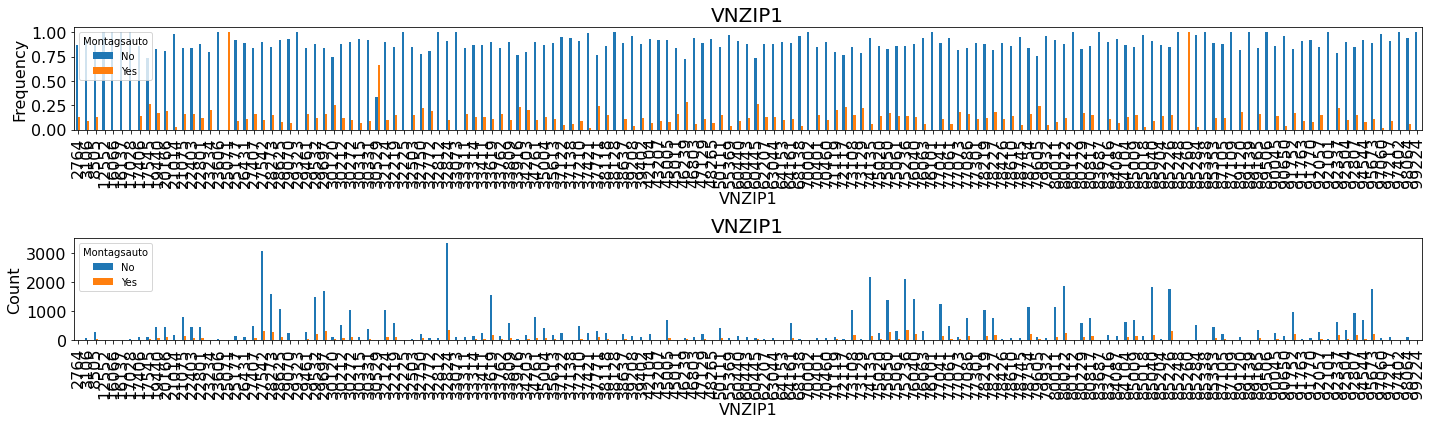

In [78]:
simpleBarPlot(df_train,'VNZIP1',2,1,'VNZIP1')

#### State where the the car was purchased

VNST,AL,AR,AZ,CA,CO,FL,GA,IA,ID,IL,IN,KY,LA,MA,MD,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
IsBadBuy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,602,54,5470,6144,4394,9305,2177,426,177,391,418,215,297,13,993,13,60,676,447,6243,25,88,277,210,472,6,728,3263,198,700,3686,1561,11719,769,1399,128,263
1,88,16,704,951,604,1142,273,73,19,67,68,15,52,2,165,1,2,82,46,799,1,9,40,29,90,0,67,331,13,147,594,203,1877,106,263,8,29



################# Plot  VNST  #################

################# Number of unique values:  37 #################



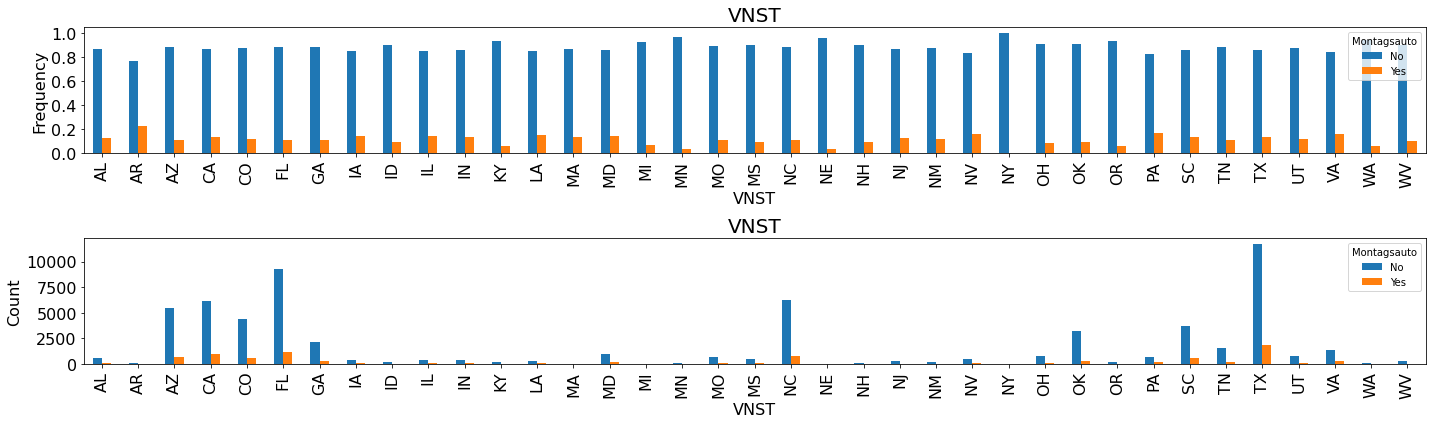

In [79]:
simpleBarPlot(df_train,'VNST',2,1,'VNST')

In [80]:
# Update drop_cols data frame
drop_cols = dropRemarks(drop_cols,'VNZIP1','Too many distinct values ')
drop_cols = dropRemarks(drop_cols,'PurchDate','Too many distinct values ')

drop_cols

,Drop Remarks
PRIMEUNIT,More than 95% of data is missing
AUCGUART,More than 95% of data is missing
Model,Too many distincts values
SubModel,Too many distincts values
VehYear,96% Correlation with VehicleAge
Trim,Too many distinct values
Color,The effect is too suspicious!
WheelTypeID,"Redundant, as WheelType is available!"
MMRCurrentAuctionCleanPrice,About 99% correlation with MMRCurrentAuctionAv...
MMRCurrentRetailCleanPrice,About 99% correlation with MMRCurrentRetailAve...


### Acquisition cost paid for the vehicle at time of purchase

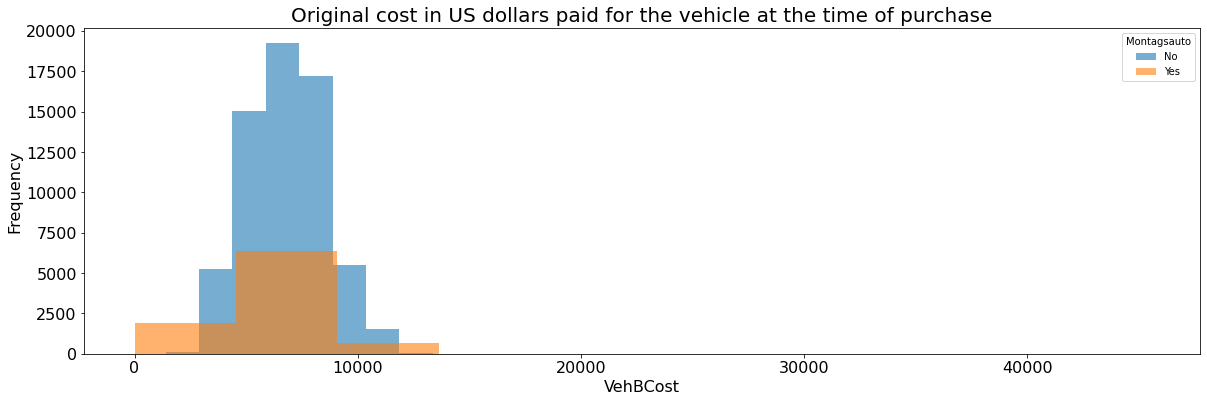

In [81]:
simpleHistPlot(df_train,'VehBCost','Original cost in US dollars paid for the vehicle at the time of purchase',False)

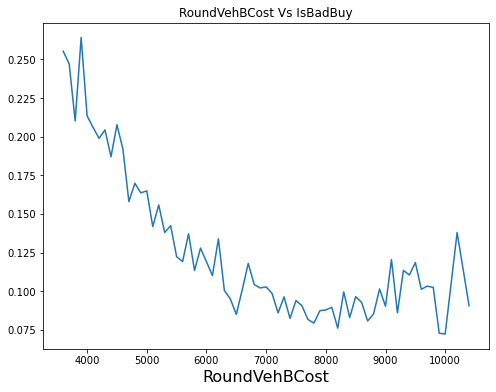

In [83]:
# create new variable essentially rounding the vehicle cost to the last two digits
df_cost_bb = df_train[['VehBCost','IsBadBuy']]
df_cost_bb['RoundVehBCost'] = round(df_cost_bb['VehBCost'],-2)


# plot the rounded vehicle cost vs. IsBadBuy

plt.figure(figsize=(8,6))
df_cost_bb.groupby('RoundVehBCost').agg([np.mean,np.size])['IsBadBuy'].query('size > 250')['mean']\
                                   .plot(title = "RoundVehBCost Vs IsBadBuy");
plt.xlabel('RoundVehBCost', fontsize=16);

#### We see that, as intuitively expected, the vehicle age increases the probability of a car being a bad buy, while the vehicle cost decreases this probability.

### Identifies if the vehicle was originally purchased online

IsOnlineSale,0,1
IsBadBuy,,
0,62375,1632
1,8763,213



################# Plot  IsOnlineSale  #################

################# Number of unique values:  2 #################



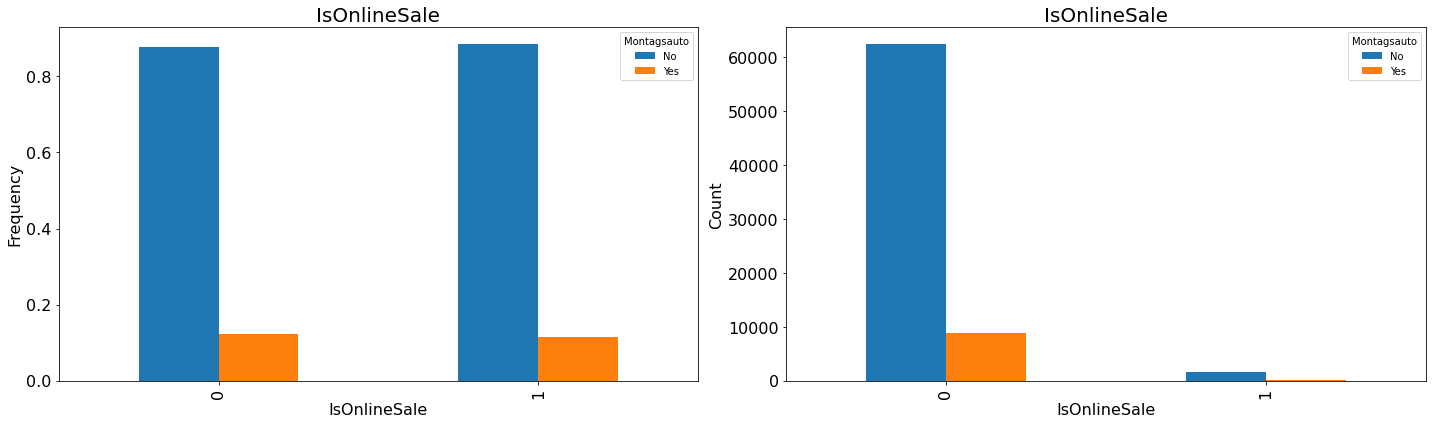

In [82]:
simpleBarPlot(df_train,'IsOnlineSale',1,2,'IsOnlineSale')

## Cost of the guarantee for a period of 36 months

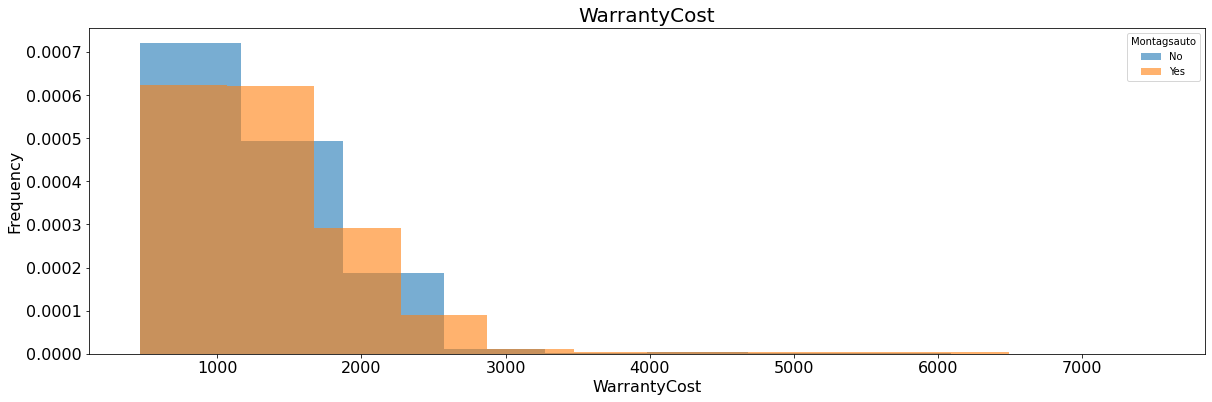

In [84]:
simpleHistPlot(df_train,'WarrantyCost','WarrantyCost',True)

### How are the numerical values distributed, are there outliers?

In [85]:
desired_num_cols = set(num_cols).difference(drop_cols.index.to_list())
desired_num_cols

{'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'VehBCost',
 'VehOdo',
 'VehicleAge',
 'WarrantyCost'}

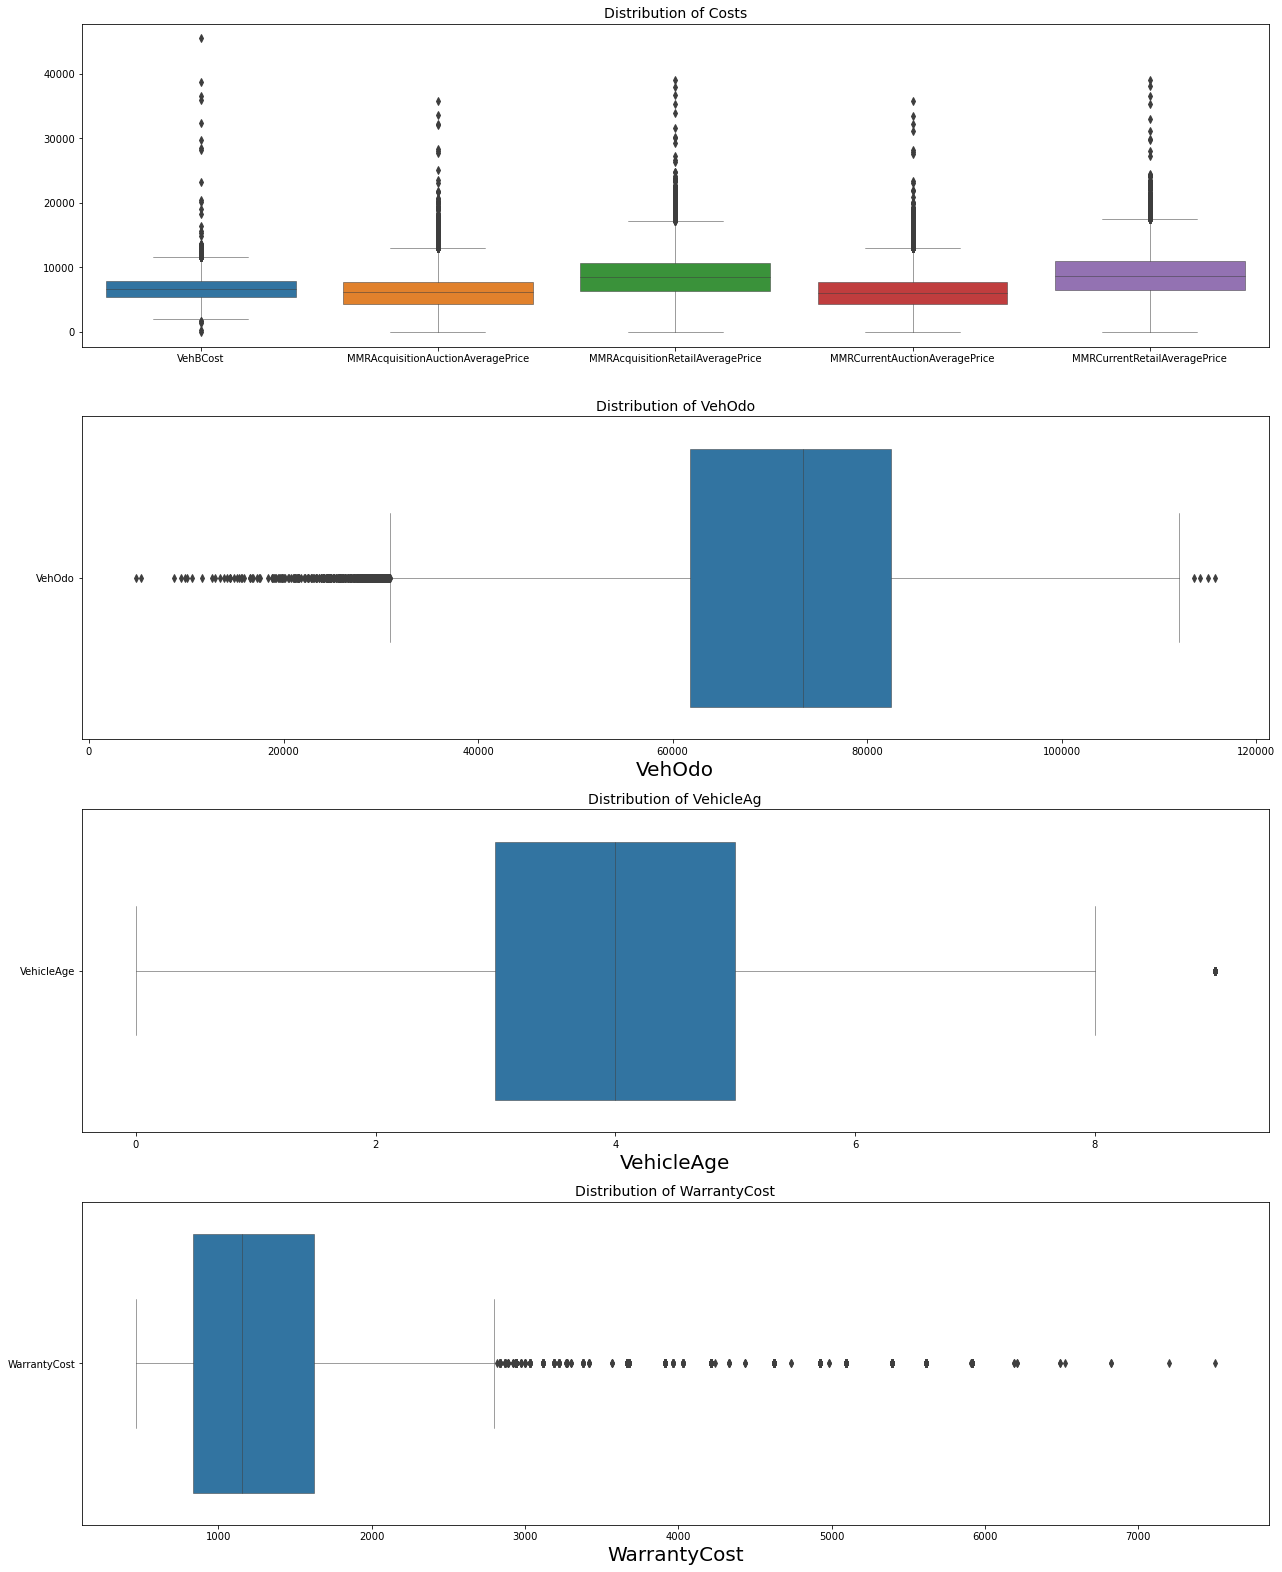

In [86]:
# Boxplots or histograms relevant columns
# Find outliers in data using a box plot
col1= ['VehBCost','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice']
col2 = ['VehOdo']
col3=['VehicleAge']
col4=['WarrantyCost']
fig, ax = plt.subplots(4,1,figsize=(18,22))
ax[0] = sns.boxplot(data=df_train[col1],linewidth=0.5, ax=ax[0]);
ax[0].set_title('Distribution of Costs', fontsize=14)

ax[1] = sns.boxplot(data=df_train[col2], orient="h",linewidth=0.5, ax=ax[1]);
# xtick, label, and title
ax[1].set_title('Distribution of VehOdo', fontsize=14)
ax[1].set_xlabel('VehOdo', fontsize=20)

ax[2] = sns.boxplot(data=df_train[col3], orient="h",linewidth=0.5, ax=ax[2]);
# xtick, label, and title
ax[2].set_title('Distribution of VehicleAg', fontsize=14)
ax[2].set_xlabel('VehicleAge', fontsize=20)


ax[3] = sns.boxplot(data=df_train[col4], orient="h",linewidth=0.5, ax=ax[3]);
# xtick, label, and title
ax[3].set_title('Distribution of WarrantyCost', fontsize=14)
ax[3].set_xlabel('WarrantyCost', fontsize=20)


sns.set(style="darkgrid")
plt.tight_layout();

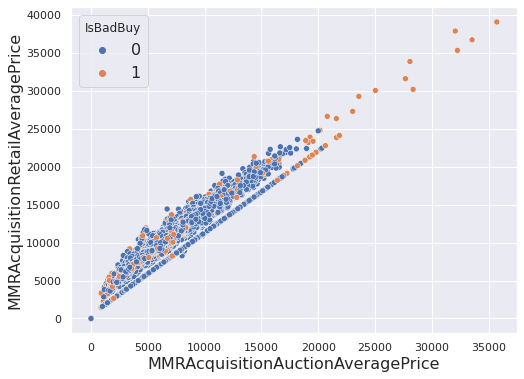

In [87]:
# Check for outliers
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x = 'MMRAcquisitionAuctionAveragePrice',
                 y  = 'MMRAcquisitionRetailAveragePrice',hue="IsBadBuy");
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=16);
plt.ylabel('MMRAcquisitionRetailAveragePrice', fontsize=16);
plt.legend(title='IsBadBuy', fontsize=16);